# Business Intelligence - Group 53 - Assignment 2

## Packages 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.pylab as plt
import scipy.sparse as sparse
from pathlib import Path
import glob
from scipy.stats import ks_2samp
import seaborn as sns

# ...

## Business understanding

In order to understand the data one should first of all understand the business. Below one can find a glossary of terms used in MMA (UFC) and their explanations.
* **Knockdown**:  A fight-ending strike. If a fighter loses consciousness ("goes limp") as a result of legal strikes it is declared a KO.
* **(Guard) pass**: A guard pass is simply a way for the fighter on top to get past the legs of the fighter on the bottom in order to reach a dominant position on the ground
* **Reversal**: Transition from a neutral or inferior position to a dominant position
* **Submission**: A submission is a combat sports term for yielding to the opponent, and hence resulting in an immediate defeat. The submission - then also referred to as a "tap out" or "tapping out" - is often performed by visibly tapping the floor or the opponent with the hand or in some cases with the foot, or by saying the word 'tap' to signal the opponent and/or the referee of the submission
* **Takedown**: A takedown is a technique that involves off-balancing an opponent and bringing him or her to the ground with the attacker landing on top.
* **Strikes**: There are two different groupings for strikes. 
  * based on body sections: **HEAD**, **BODY**, **LEG** 
  * based on positions/ranges
    * **Clinch**: A position in which two standing individuals have grabbed ahold of one another. Strikes given and taken in a clinch position.
    * **Ground**: Strikes given and taken when the fighters are on the ground
    * **Distance**: Distance strikes are all strikes that are not clinche-strikes or ground strikes. This is the most common type of striking.
* **Stance**: Which foot is placed closer to the opponent. E.g. left in orthodox stance and right in southpaw


## Data understanding

Analyze the characteristics of the dataset (size, attribute types and semantics as discussed in class, value ranges, sparsity, min/max values, outliers, missing values, ...), and describe this in the report

### Data description

Following clustering of attributes is based on logical grouping and not on the attribute type. Many attributes are prefixed with either 'r' or 'b' which stands for red or blue fighter. To not copy every attribute description for each prefix those attributes in the following tables are prefixed with b/r_.

#### Bout stats
Attribute | Description | Attribute type 
--- | --- | ---
Referee | Name of Referee | Nominal
location | Fight location | Nominal
weight_class | Weight class of this bout and fighters | Ordinal
Date | Date of fight | Ordinal
title_bout | Stating whether the bout was a title bout | Binary
Winner | Winner of the fight | Nominal
no_of_rounds | Number of rounds the bout had. | Ratio

#### Basic fighter stats
Attribute | Description | Attribute type 
--- | --- | ---
b/r_fighter | Name of respective fighter | Nominal
b/r_Stance | Fighting stance | Nominal
b/r_age | Age of fighter | Ratio
b/r_Height_cms | The fighter's height | Ratio
b/r_Reach_cms | The fighter's reach | Ratio
b/r_Weight_lbs | The fighter's weight in lbs | Ratio

#### Fighter bout stats
Attribute | Description | Attribute type 
--- | --- | ---
b/r_win_by_Decision_Majority | Wins by Decision of the majority | Ratio
b/r_win_by_Decision_Split | Wins by Decision Split | Ratio
b/r_win_by_Decision_Unanimous | Wins by Decision Unanimous | Ratio
b/r_win_by_KO/TKO | Wins by Knockout or technical Knockout | Ratio
b/r_win_by_Submission | Wins by submission | Ratio
b/r_win_by_TKO_Doctor_Stoppage | Wins due to doctor stopping the fight | Ratio
b/r_wins | Total number of wins for the fighter | Ratio
b/r_losses | Total number of losses for the fighter | Ratio
b/r_draw | How many draws did the fighter have | Ratio
b/r_current_lose_streak | How many fights did the fighter lose in a row since last win | Ratio
b/r_current_win_streak | How many fights did the fighter win in a row since the last loss | Ratio
b/r_longest_win_streak | How many fights did the fighter win in a row at his/her longest | Ratio
b/r_total_rounds_fought | Number of rounds the fighter fought in total | Ratio
b/r_total_time_fought(seconds) | Total fighting time in seconds | Ratio
b/r_total_title_bouts | How many title bouts did the fighter have so far | Ratio

#### Damage dealt to opponent 
Attribute | Description | Attribute type 
--- | --- | ---
b/r_avg_BODY_att | Average body attacks attended (fighter level) | Ratio
b/r_avg_BODY_landed | Average attacks landed (fighter level) | Ratio
b/r_avg_HEAD_att | Average head attacks attended (fighter level) | Ratio
b/r_avg_HEAD_landed | Average head attacks landed (fighter level) | Ratio
b/r_avg_LEG_att |  Average leg attacks attended (fighter level) | Ratio
b/r_avg_LEG_landed |  Average leg attacks landed (fighter level) | Ratio
b/r_avg_CLINCH_att | Average clinches attended (fighter level) | Ratio
b/r_avg_CLINCH_landed | Average clinches landed (fighter level) | Ratio
b/r_avg_DISTANCE_att | Average distance strikes attended (fighter level) | Ratio
b/r_avg_DISTANCE_landed | Average distance strikes landed (fighter level) | Ratio
b/r_avg_GROUND_att | Average ground strikes attended (fighter level) | Ratio
b/r_avg_GROUND_landed | Average ground strikes landed (fighter level) | Ratio
b/r_avg_SIG_STR_att | Average significant strikes attended (fighter level) | Ratio
b/r_avg_SIG_STR_landed | Average significant strikes landed (fighter level) | Ratio
b/r_avg_SIG_STR_pct | | Ratio
b/r_avg_TD_att | Average tackedowns (fighter level) | Ratio
b/r_avg_TD_landed | Average tackedowns landed (fighter level) | Ratio
b/r_avg_TD_pct | | Ratio
b/r_avg_TOTAL_STR_att | Average total strikes attended (fighter level) | Ratio
b/r_avg_TOTAL_STR_landed | Average total strikes landed (fighter level) | Ratio
b/r_avg_KD | Average knockdowns (fighter level) | Ratio
b/r_avg_PASS | Average passes (fighter level) | Ratio
b/r_avg_REV | Average reversals (fighter level) | Ratio
b/r_avg_SUB_ATT | Average submissions (fighter level) | Ratio

#### Damage dealt by opponent
Attribute | Description | Attribute type 
--- | --- | ---
b/r_avg_opp_BODY_att | Average body attacks attended (fighter level) | Ratio
b/r_avg_opp_BODY_landed | Average attacks landed (fighter level) | Ratio
b/r_avg_opp_HEAD_att | Average head attacks attended (fighter level) | Ratio
b/r_avg_opp_HEAD_landed | Average head attacks landed (fighter level) | Ratio
b/r_avg_opp_LEG_att |  Average leg attacks attended (fighter level) | Ratio
b/r_avg_opp_LEG_landed |  Average leg attacks landed (fighter level) | Ratio
b/r_avg_opp_CLINCH_att | Average clinches attended (fighter level) | Ratio
b/r_avg_opp_CLINCH_landed | Average clinches landed (fighter level) | Ratio
b/r_avg_opp_DISTANCE_att | Average distance strikes attended (fighter level) | Ratio
b/r_avg_opp_DISTANCE_landed | Average distance strikes landed (fighter level) | Ratio
b/r_avg_opp_GROUND_att | Average ground strikes attended (fighter level) | Ratio
b/r_avg_opp_GROUND_landed | Average ground strikes landed (fighter level) | Ratio
b/r_avg_opp_SIG_STR_att | Average significant strikes attended (fighter level) | Ratio
b/r_avg_opp_SIG_STR_landed | Average significant strikes landed (fighter level) | Ratio
b/r_avg_opp_SIG_STR_pct | | Ratio
b/r_avg_opp_TD_att | Average tackedowns (fighter level) | Ratio
b/r_avg_opp_TD_landed | Average tackedowns landed (fighter level) | Ratio
b/r_avg_opp_TD_pct | | Ratio
b/r_avg_opp_TOTAL_STR_att | Average total strikes attended (fighter level) | Ratio
b/r_avg_opp_TOTAL_STR_landed | Average total strikes landed (fighter level) | Ratio
b/r_avg_opp_KD | Average knockdowns (fighter level) | Ratio
b/r_avg_opp_PASS | Average passes (fighter level) | Ratio
b/r_avg_opp_REV | Average reversals (fighter level) | Ratio
b/r_avg_opp_SUB_ATT | Average submissions (fighter level) | Ratio

We clustered the attributes into five logical clusters. The first one, \"Bout stats\", gives away basic information about the bout itself ( e.g. when it took place, which weight class, who was the referee, ...).  Mostly nominal and ordinal attributes are grouped here. The second cluster is about basic fighter attributes of descriptive nature (height, weight, age, ...). The third cluster captures basic stats about the fighter. As already mentioned there are two fighter attributes for each fighter which differ only in the prefix. (R_ or B_). This cluster has also one aggregated attribute \"R/B_wins\" which should be the sum of six other \"win characteristics\" referring to the way the fighter won (e.g. R_win_by_KO/TKO). It is a first sign of Colinearity between the sub characteristics of win and win itself. The forth cluster contains stats about the damage dealt to the opponent by using different moves and strikes. The fifth cluster is like the fourth just with switched roles (The damage the opponent dealt to the fighter). It also contains aggregated attributes such as b/r_avg_opp_SIG_STR_att and b/r_avg_opp_SIG_STR_landed. Later two attributes aggregate \"HEAD, BODY, LEG\" as well as \"DISTANCE, GROUND, CLINCH\" strikes, attended and landed respectively.
   

In [33]:
'''
-Identify data and method of capture
-Perform basic statistical analysis
    “For each attribute compute the basic statistics”
    - Average
    - Min/max values
    - Variance, standard deviation, mode, skewness, …
    - Histogram: encoding issues (0, 99, -1, 1.1.1900, …)
    - Correlation between attributes
'''

def load_ufc_data():
    
    path = Path("../source_data/data.csv")
    ufc_data = pd.read_csv(path, header=0, delimiter=",",encoding ='utf-8')
    
    return ufc_data

data_ufc = load_ufc_data()

def semantics_check():
    data_ufc_check = data_ufc.copy()
    data_ufc_check.dropna(inplace=True)
    
    # Current win streak must be smaller or equal than wins
    assert np.less_equal(data_ufc_check['R_current_win_streak'].values, 
                               data_ufc_check['R_wins'].values).all()
    
    # Current lose streak must be smaller or equal than total losses
    assert np.less_equal(data_ufc_check['R_current_lose_streak'].values, 
                               data_ufc_check['R_losses'].values).all()
    
    # Wins must be the sum of all sub win characteristics
    # Is not always the case, that is why the condition is weaker here. Maybe data quality issue
    np.less_equal(data_ufc_check.loc[:,'R_wins'],
                        data_ufc_check.loc[:,['R_win_by_Decision_Majority',
                                              'R_win_by_Decision_Split',
                                              'R_win_by_Decision_Unanimous',
                                              'R_win_by_KO/TKO',
                                              'R_win_by_Submission',
                                              'R_win_by_TKO_Doctor_Stoppage']].sum(axis=1)).all()
                       
    
       
    # Signficant strikes must equal the sum of each categorized strike group's characteristics  
    assert np.allclose(data_ufc_check.loc[:,'R_avg_SIG_STR_att'],
                data_ufc_check.loc[:,['R_avg_CLINCH_att','R_avg_DISTANCE_att',
                                      'R_avg_GROUND_att']].sum(axis=1), 
                rtol=0.00001)
    assert np.allclose(data_ufc_check.loc[:,'R_avg_SIG_STR_att'],
                data_ufc_check.loc[:,['R_avg_BODY_att','R_avg_HEAD_att',
                                      'R_avg_LEG_att']].sum(axis=1), 
                rtol=0.00001)
    assert np.allclose(data_ufc_check.loc[:,['R_avg_CLINCH_att','R_avg_DISTANCE_att',
                                             'R_avg_GROUND_att']].sum(axis=1),
                data_ufc_check.loc[:,['R_avg_BODY_att','R_avg_HEAD_att',
                                      'R_avg_LEG_att']].sum(axis=1), 
                rtol=0.00001)
    
    # Strikes based on body sections and positions/ranges. 
    # There must be more or euqal attended strikes than landed
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_HEAD_att'].values,
                   data_ufc_check.loc[:,'R_avg_HEAD_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_BODY_att'].values,
                   data_ufc_check.loc[:,'R_avg_BODY_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_LEG_att'].values,
                   data_ufc_check.loc[:,'R_avg_LEG_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_CLINCH_att'].values,
                   data_ufc_check.loc[:,'R_avg_CLINCH_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_DISTANCE_att'].values,
                   data_ufc_check.loc[:,'R_avg_DISTANCE_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_GROUND_att'].values,
                   data_ufc_check.loc[:,'R_avg_GROUND_landed'].values).all()
    
    # Takedowns, significant strikes, total strikes
    # There must be more or euqal attended strikes/moves than landed
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_SIG_STR_att'].values,
                   data_ufc_check.loc[:,'R_avg_SIG_STR_landed'].values).all()  
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_TD_att'].values,
                   data_ufc_check.loc[:,'R_avg_TD_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_TOTAL_STR_att'].values,
                   data_ufc_check.loc[:,'R_avg_TOTAL_STR_landed'].values).all()
    return "Assertions passed. Check the assertions to learn more about the semantics of this data set."
semantics_check()


'Assertions passed. Check the assertions to learn more about the semantics of this data set.'

The condition "Wins must be the sum of all sub win characteristics" is not always fullfiled. Only the condition "sum sub win characteristics <= wins" is fullfilled. All other semantics are valid.

In [34]:
# Checking whether R and B are from the same distribution
r_attributes = ['R_age','R_Height_cms', 'R_Weight_lbs', 'R_Reach_cms',
                'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_TD_att',
                'R_avg_TD_landed', 'R_avg_KD', 'R_wins', 'R_losses',
                'R_total_time_fought(seconds)']
b_attributes = ['B_age', 'B_Height_cms', 'B_Weight_lbs', 'B_Reach_cms',
                'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_TD_att',
                'B_avg_TD_landed', 'B_avg_KD', 'B_wins', 'B_losses',
                'B_total_time_fought(seconds)']
for i in range(len(r_attributes)):
    print(r_attributes[i])
    data = data_ufc.loc[:,[r_attributes[i], b_attributes[i]]].dropna()
    x = data[b_attributes[i]].sort_values()
    y = data[r_attributes[i]].sort_values()
    print(ks_2samp(x,y))


R_age
Ks_2sampResult(statistic=0.04143088116410671, pvalue=0.0004090161094990995)
R_Height_cms
Ks_2sampResult(statistic=0.022598870056497175, pvalue=0.14534096969736768)
R_Weight_lbs
Ks_2sampResult(statistic=0.009735202492211837, pvalue=0.9680739977284712)
R_Reach_cms
Ks_2sampResult(statistic=0.01589825119236884, pvalue=0.6340491472005213)
R_avg_SIG_STR_att
Ks_2sampResult(statistic=0.052083333333333336, pvalue=0.00010045436767024714)
R_avg_SIG_STR_landed
Ks_2sampResult(statistic=0.06524122807017543, pvalue=3.578447750666425e-07)
R_avg_TD_att
Ks_2sampResult(statistic=0.05345394736842105, pvalue=5.9240119080182335e-05)
R_avg_TD_landed
Ks_2sampResult(statistic=0.0712719298245614, pvalue=1.768182045708713e-08)
R_avg_KD
Ks_2sampResult(statistic=0.0912828947368421, pvalue=1.2109158905059224e-13)
R_wins
Ks_2sampResult(statistic=0.15493779160186624, pvalue=2.8881187846506676e-54)
R_losses
Ks_2sampResult(statistic=0.11450233281493001, pvalue=8.910912267326086e-30)
R_total_time_fought(seconds)
K

Interestingly, a lot of R and B attribute pairs do not come from the same distribution as indicated by small p-values. It seems that there are e.g. totally different distributions in age between the red and the blue fighter. Also the differently distributed wins are somewhat suspicious. This we need to re-check again with a histogram in the data exploration section.

In [35]:
def basic_statistics(data):
    print(data.describe())
    
    
# Dataframes of clustered attributes in "Data understanding"
data_ufc_basic_bout_stats = data_ufc.loc[:,['Referee',
                                            'location',
                                            'weight_class',
                                            'date',
                                            'title_bout',
                                            'Winner', 
                                            'no_of_rounds']]

data_ufc_basic_fighter_stats_R = data_ufc.loc[:,['R_age', 'R_Height_cms', 'R_Weight_lbs', 'R_Reach_cms']]

data_ufc_fighter_bout_stats_R = data_ufc.loc[:,['R_win_by_Decision_Majority',
                                              'R_win_by_Decision_Split',
                                              'R_win_by_Decision_Unanimous',
                                              'R_win_by_KO/TKO',
                                              'R_win_by_Submission',
                                              'R_win_by_TKO_Doctor_Stoppage',
                                              'R_wins',
                                              'R_losses',
                                              'R_draw',
                                              'R_current_lose_streak',
                                              'R_current_win_streak',
                                              'R_longest_win_streak',
                                              'R_total_rounds_fought',
                                              'R_total_time_fought(seconds)',
                                              'R_total_title_bouts']]

data_ufc_damage_dealt_R = data_ufc.loc[:, ['R_avg_BODY_att',
                                                        'R_avg_BODY_landed',
                                                        'R_avg_HEAD_att',
                                                        'R_avg_HEAD_landed',
                                                        'R_avg_LEG_att',
                                                        'R_avg_LEG_landed',
                                                        'R_avg_CLINCH_att',
                                                        'R_avg_CLINCH_landed',
                                                        'R_avg_DISTANCE_att',
                                                        'R_avg_DISTANCE_landed',
                                                        'R_avg_GROUND_att',
                                                        'R_avg_GROUND_landed',
                                                        'R_avg_SIG_STR_att',
                                                        'R_avg_SIG_STR_landed',
                                                        'R_avg_SIG_STR_pct',
                                                        'R_avg_TD_att',
                                                        'R_avg_TD_landed',
                                                        'R_avg_TD_pct',
                                                        'R_avg_TOTAL_STR_att',
                                                        'R_avg_TOTAL_STR_landed',
                                                        'R_avg_KD',
                                                        'R_avg_PASS',
                                                        'R_avg_REV',
                                                        'R_avg_SUB_ATT']]

data_ufc_damage_dealt_opp_R = data_ufc.loc[:, ['R_avg_opp_BODY_att',
                                                        'R_avg_opp_BODY_landed',
                                                        'R_avg_opp_HEAD_att',
                                                        'R_avg_opp_HEAD_landed',
                                                        'R_avg_opp_LEG_att',
                                                        'R_avg_opp_LEG_landed',
                                                        'R_avg_opp_CLINCH_att',
                                                        'R_avg_opp_CLINCH_landed',
                                                        'R_avg_opp_DISTANCE_att',
                                                        'R_avg_opp_DISTANCE_landed',
                                                        'R_avg_opp_GROUND_att',
                                                        'R_avg_opp_GROUND_landed',
                                                        'R_avg_opp_SIG_STR_att',
                                                        'R_avg_opp_SIG_STR_landed',
                                                        'R_avg_opp_SIG_STR_pct',
                                                        'R_avg_opp_TD_att',
                                                        'R_avg_opp_TD_landed',
                                                        'R_avg_opp_TD_pct',
                                                        'R_avg_opp_TOTAL_STR_att',
                                                        'R_avg_opp_TOTAL_STR_landed',
                                                        'R_avg_opp_KD',
                                                        'R_avg_opp_PASS',
                                                        'R_avg_opp_REV',
                                                        'R_avg_opp_SUB_ATT']]

# B fighter stats
data_ufc_basic_fighter_stats_B = data_ufc.loc[:,['B_age', 'B_Height_cms', 'B_Weight_lbs', 'B_Reach_cms']]

data_ufc_fighter_bout_stats_B = data_ufc.loc[:,['B_win_by_Decision_Majority',
                                              'B_win_by_Decision_Split',
                                              'B_win_by_Decision_Unanimous',
                                              'B_win_by_KO/TKO',
                                              'B_win_by_Submission',
                                              'B_win_by_TKO_Doctor_Stoppage',
                                              'B_wins',
                                              'B_losses',
                                              'B_draw',
                                              'B_current_lose_streak',
                                              'B_current_win_streak',
                                              'B_longest_win_streak',
                                              'B_total_rounds_fought',
                                              'B_total_time_fought(seconds)',
                                              'B_total_title_bouts']]

data_ufc_damage_dealt_B = data_ufc.loc[:, ['B_avg_BODY_att',
                                            'B_avg_BODY_landed',
                                            'B_avg_HEAD_att',
                                            'B_avg_HEAD_landed',
                                            'B_avg_LEG_att',
                                            'B_avg_LEG_landed',
                                            'B_avg_CLINCH_att',
                                            'B_avg_CLINCH_landed',
                                            'B_avg_DISTANCE_att',
                                            'B_avg_DISTANCE_landed',
                                            'B_avg_GROUND_att',
                                            'B_avg_GROUND_landed',
                                            'B_avg_SIG_STR_att',
                                            'B_avg_SIG_STR_landed',
                                            'B_avg_SIG_STR_pct',
                                            'B_avg_TD_att',
                                            'B_avg_TD_landed',
                                            'B_avg_TD_pct',
                                            'B_avg_TOTAL_STR_att',
                                            'B_avg_TOTAL_STR_landed',
                                            'B_avg_KD',
                                            'B_avg_PASS',
                                            'B_avg_REV',
                                            'B_avg_SUB_ATT']]

data_ufc_damage_dealt_opp_B = data_ufc.loc[:, ['B_avg_opp_BODY_att',
                                            'B_avg_opp_BODY_landed',
                                            'B_avg_opp_HEAD_att',
                                            'B_avg_opp_HEAD_landed',
                                            'B_avg_opp_LEG_att',
                                            'B_avg_opp_LEG_landed',
                                            'B_avg_opp_CLINCH_att',
                                            'B_avg_opp_CLINCH_landed',
                                            'B_avg_opp_DISTANCE_att',
                                            'B_avg_opp_DISTANCE_landed',
                                            'B_avg_opp_GROUND_att',
                                            'B_avg_opp_GROUND_landed',
                                            'B_avg_opp_SIG_STR_att',
                                            'B_avg_opp_SIG_STR_landed',
                                            'B_avg_opp_SIG_STR_pct',
                                            'B_avg_opp_TD_att',
                                            'B_avg_opp_TD_landed',
                                            'B_avg_opp_TD_pct',
                                            'B_avg_opp_TOTAL_STR_att',
                                            'B_avg_opp_TOTAL_STR_landed',
                                            'B_avg_opp_KD',
                                            'B_avg_opp_PASS',
                                            'B_avg_opp_REV',
                                            'B_avg_opp_SUB_ATT']]


pd.set_option("display.max_columns", None)
print("Bout stats")
basic_statistics(data_ufc_basic_bout_stats['no_of_rounds'])

print("Basic fighter stats")
basic_statistics(data_ufc_basic_fighter_stats_R)

print("Fighter bout stats")
basic_statistics(data_ufc_fighter_bout_stats_R)

print("Damage dealt to opponent")
basic_statistics(data_ufc_damage_dealt_R)

print("Damage dealt by opponent")
basic_statistics(data_ufc_damage_dealt_opp_R)

Bout stats
count    5144.000000
mean        3.119362
std         0.631457
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: no_of_rounds, dtype: float64
Basic fighter stats
             R_age  R_Height_cms  R_Weight_lbs  R_Reach_cms
count  5080.000000   5140.000000   5141.000000  4828.000000
mean     29.442323    179.274089    172.075861   183.664412
std       4.141927      8.638978     35.164075    10.304375
min      19.000000    152.400000    115.000000   152.400000
25%      26.000000    172.720000    145.000000   177.800000
50%      29.000000    180.340000    170.000000   182.880000
75%      32.000000    185.420000    185.000000   190.500000
max      47.000000    210.820000    345.000000   213.360000
Fighter bout stats
       R_win_by_Decision_Majority  R_win_by_Decision_Split  \
count                 5144.000000              5144.000000   
mean                     0.027605                 0.280910   
std                  

       R_avg_opp_BODY_att  R_avg_opp_BODY_landed  R_avg_opp_HEAD_att  \
count         4494.000000            4494.000000         4494.000000   
mean             8.156701               5.498694           52.001285   
std              6.200441               4.242793           33.816262   
min              0.000000               0.000000            0.000000   
25%              3.600000               2.500000           28.250000   
50%              7.000000               4.800000           46.666667   
75%             11.494565               7.500000           69.333333   
max             75.000000              41.000000          400.000000   

       R_avg_opp_HEAD_landed  R_avg_opp_LEG_att  R_avg_opp_LEG_landed  \
count            4494.000000        4494.000000           4494.000000   
mean               16.858422           5.957743              4.614770   
std                11.670925           5.151310              3.976328   
min                 0.000000           0.000000            

Above stats show all numeric attributes from fighter R. We believe that B and R attribute pairs follow the same distribution and that it suffices to describe just one fighter for first insights. At a later steps we will also look at the distribution of both fighters' numeric attributes. From the description we can already see that there are missing values if we look at the count. The count also reveals that there is a bunch of count groups with equal counts hinting that some attributes might be missing together. E.g. we can see that all "Damage dealt attributes" have the same count 4494 which is smaller than the number of rows in this data set. By comparing the mean and the median (labeled as 50%) we can confirm the existence of univariate outliers. We see that e.g. R_avg_REV has a median of 0 while the mean is 0.153263. The 3rd quartile is 0.213346 so the mean is much closer to the 3rd quartile than the median. This is an indication of skewness (left-tailed) and skewed variables are problematic for outlier detection with simple methods such as boxplots.

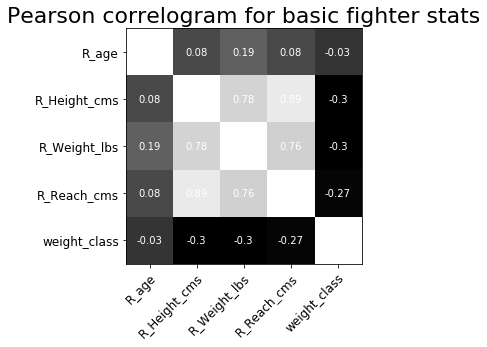

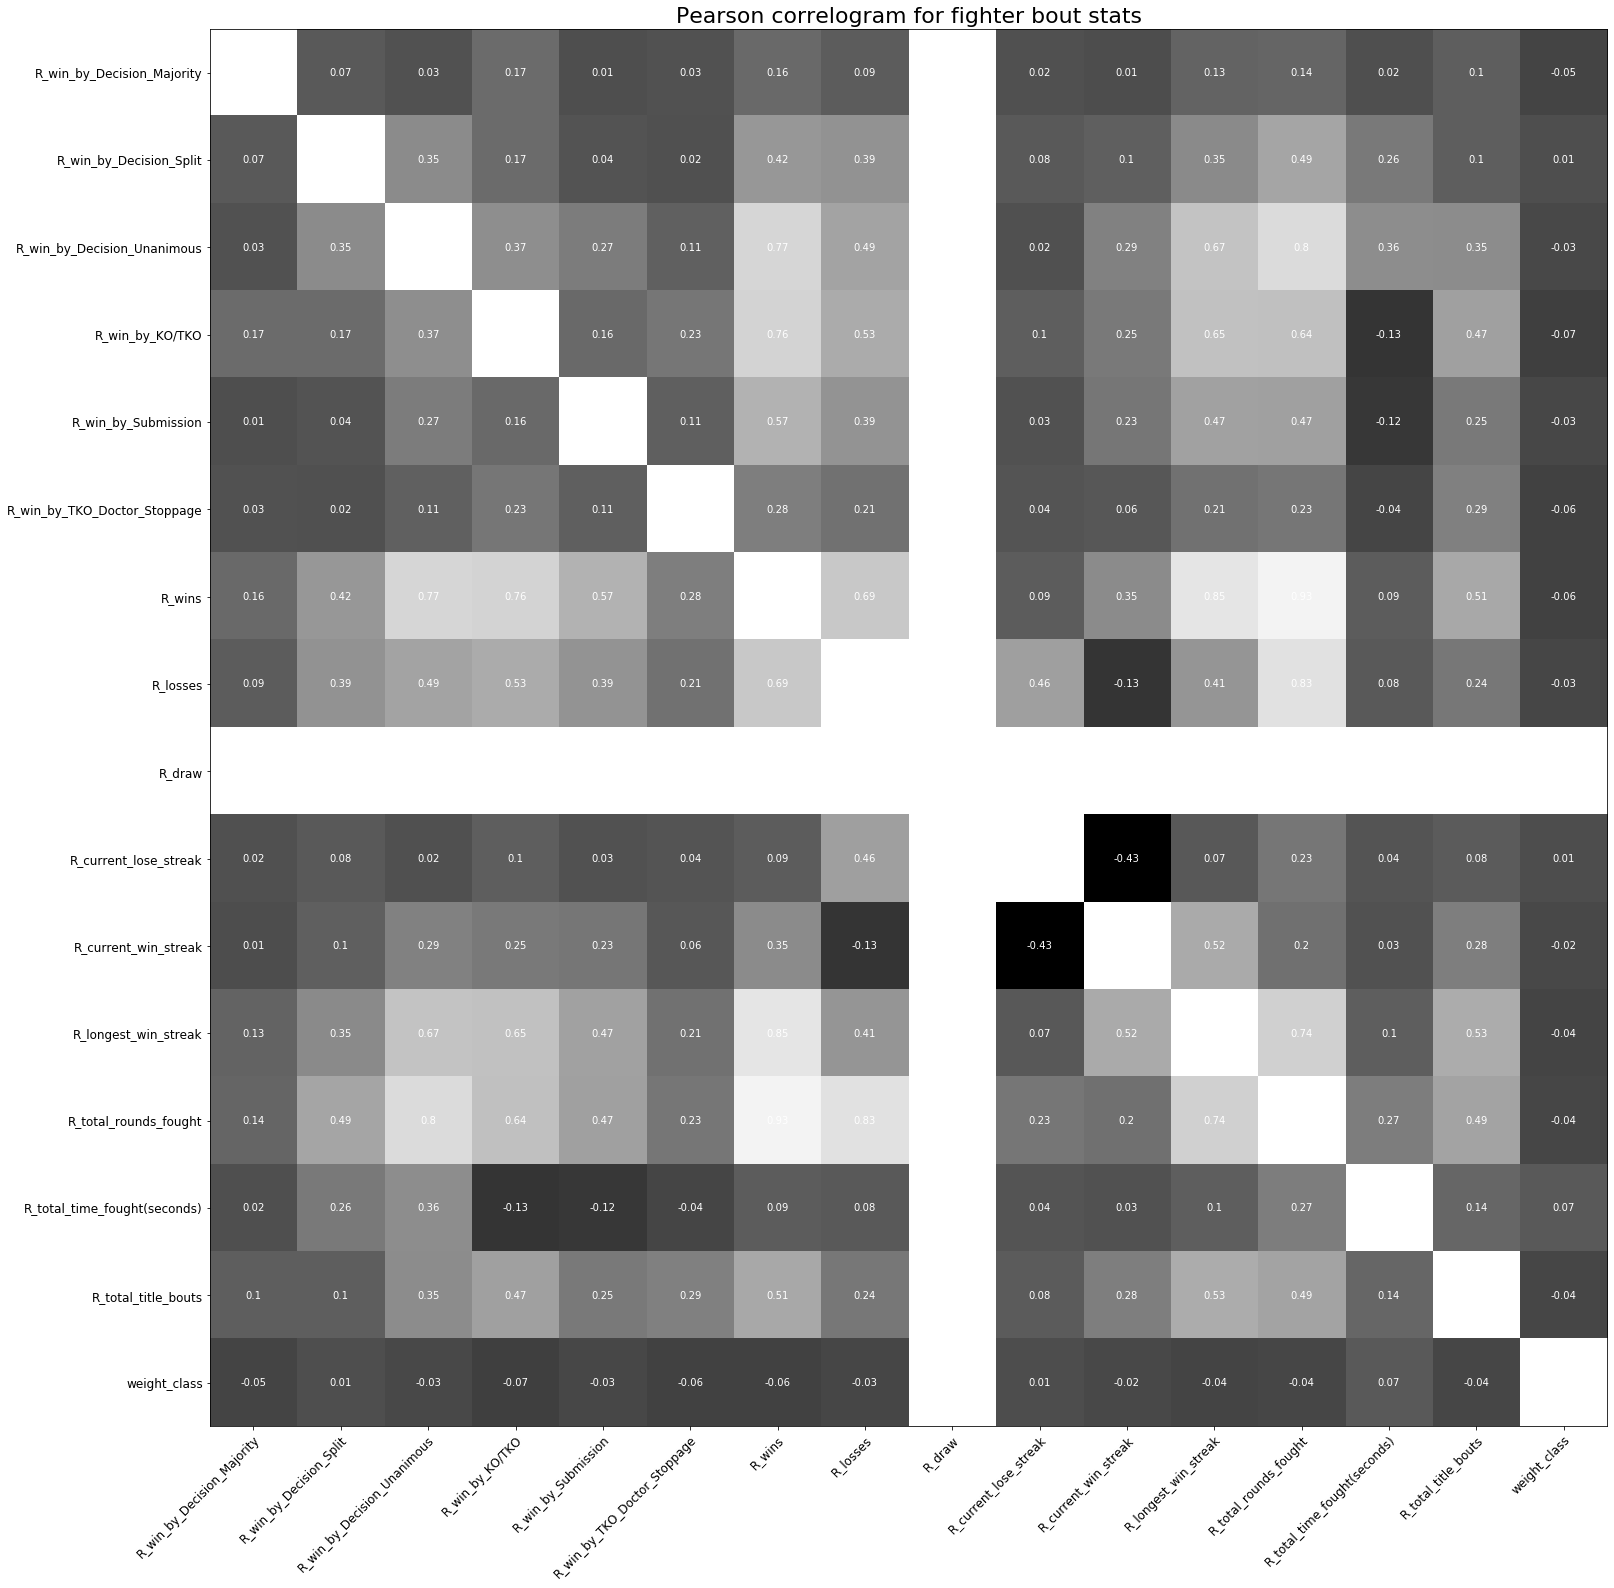

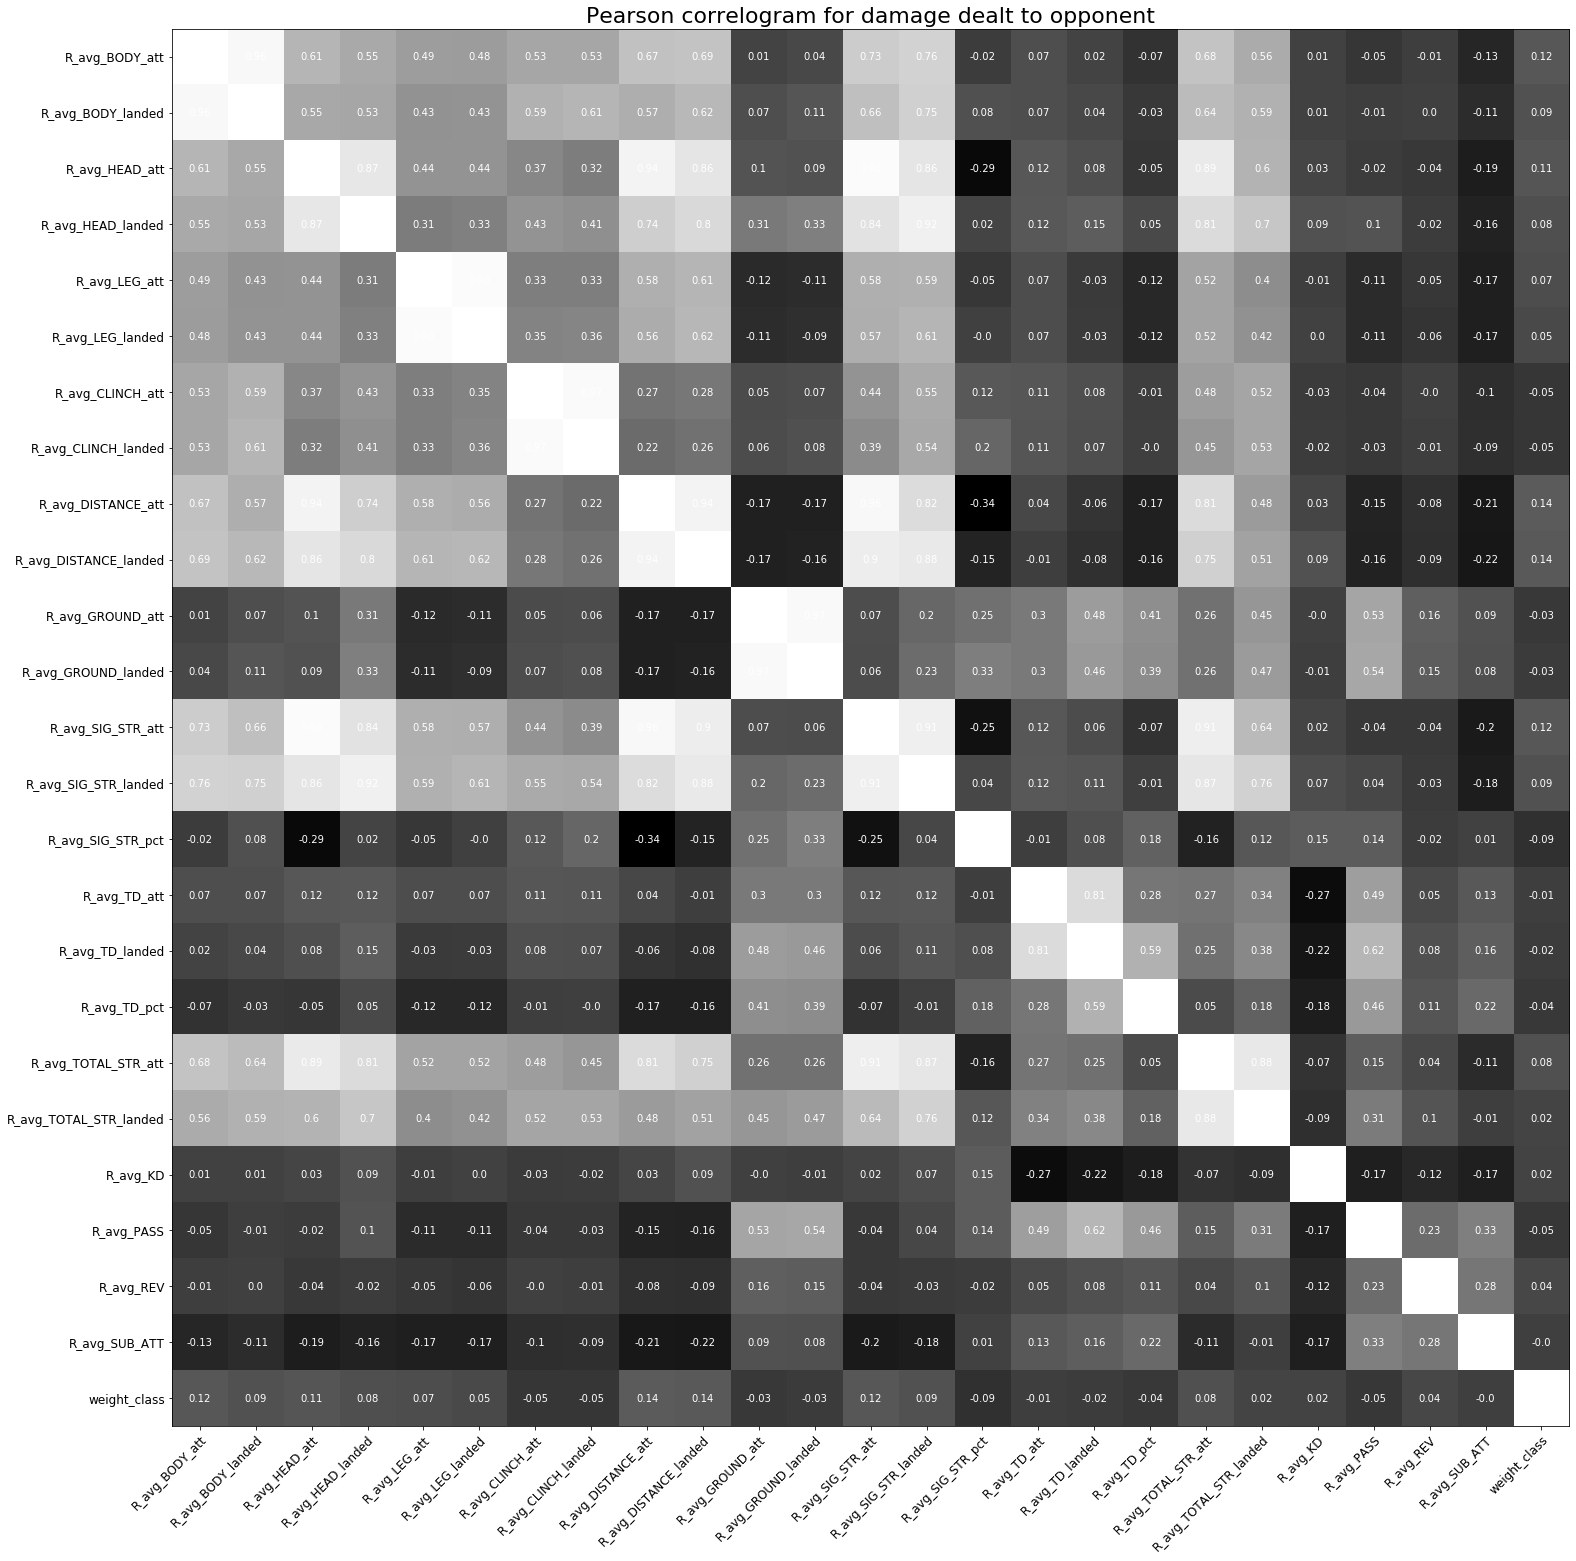

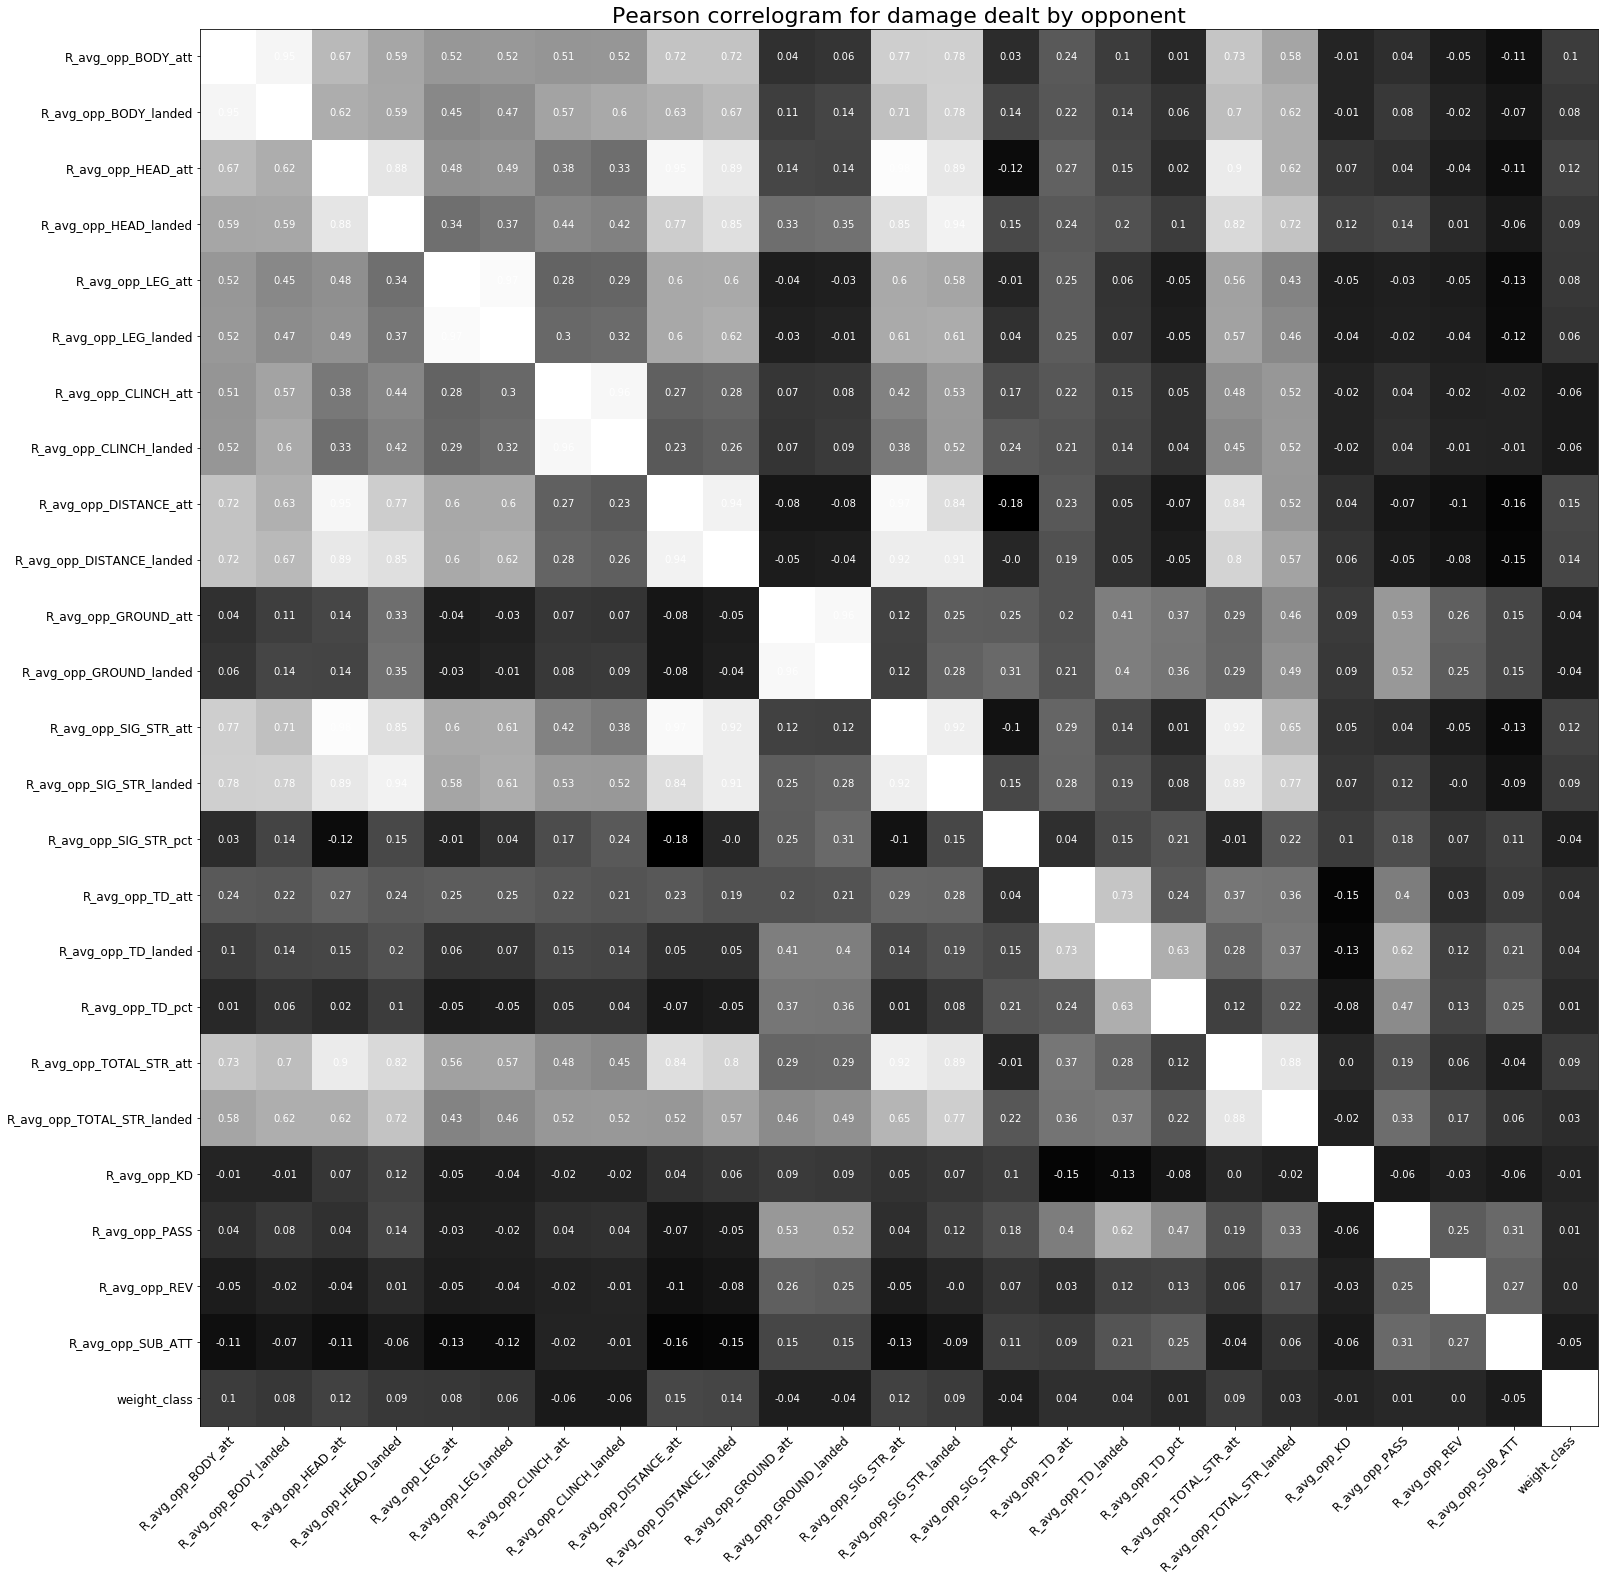

In [36]:
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()

data_ufc_basic_bout_stats_copy = data_ufc_basic_bout_stats.copy()
data_ufc_basic_bout_stats_copy['weight_class'] = lb.fit_transform(data_ufc_basic_bout_stats_copy['weight_class']) # Winner

def plot_correlogram(data, height, width, title):
    data_corr = data.copy()
    data_corr['weight_class'] = data_ufc_basic_bout_stats_copy['weight_class']
    scaler = StandardScaler()
    data_merged_scaled = pd.DataFrame(scaler.fit_transform(data_corr),
                                      columns=data_corr.columns)

    df = data_corr
    fig, ax = plt.subplots(figsize=(height,width))
    plt.tight_layout()
    corr = data_merged_scaled.corr()
    im = ax.imshow(corr,cmap='gray')

    # Decorations
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_yticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    ax.set_ylim(len(df.columns)-0.5, -0.5) # just here due to a bug in matplotlib 3.1.1. fixed in 3.1.2

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            text = ax.text(j, i, round(corr.iloc[i, j],2),
                           ha="center", va="center", color="w")

    plt.title(title, fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()
    
plot_correlogram(data_ufc_basic_fighter_stats_R, 4,4, "Pearson correlogram for basic fighter stats")
plot_correlogram(data_ufc_fighter_bout_stats_R,25,20, "Pearson correlogram for fighter bout stats")
plot_correlogram(data_ufc_damage_dealt_R,25,20, "Pearson correlogram for damage dealt to opponent")
plot_correlogram(data_ufc_damage_dealt_opp_R,25,20, "Pearson correlogram for damage dealt by opponent")

We first binarized the attribute weight_class and merged it with each of the three vertically split numeric datasets to see how the numeric variables correlate with weight_class. We see that it boils down to three attributes (just R-fighter evaluated), namely R_Weight_lbs, R_height_cms abd R_Reach_cms having a negative correlation around ~0.3. It has to be mentioned that correlation does not work well with binary attributes but it is still a hint that only those three attributes for each fighter are somewhat useful to predict weight_class as all the other attributes revolve around 0 to 0.1 correlation.

In [37]:
data_ufc.info()
print("data_ufc_basic_bout_stats \n", data_ufc_basic_bout_stats.isnull().sum(axis=0))
print("data_ufc_basic_fighter_stats_R\n", data_ufc_basic_fighter_stats_R.isnull().sum(axis=0))
print("data_ufc_basic_fighter_stats_B\n", data_ufc_basic_fighter_stats_B.isnull().sum(axis=0))
print("data_ufc_fighter_bout_stats_R\n", data_ufc_fighter_bout_stats_R.isnull().sum(axis=0))
print("data_ufc_fighter_bout_stats_B\n", data_ufc_fighter_bout_stats_B.isnull().sum(axis=0))
print("data_ufc_damage_dealt_R\n", data_ufc_damage_dealt_R.isnull().sum(axis=0))
print("data_ufc_damage_dealt_B\n", data_ufc_damage_dealt_B.isnull().sum(axis=0))
print("data_ufc_damage_dealt_opp_R\n", data_ufc_damage_dealt_opp_R.isnull().sum(axis=0))
print("data_ufc_damage_dealt_opp_B\n", data_ufc_damage_dealt_opp_B.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB
data_ufc_basic_bout_stats 
 Referee         23
location         0
weight_class     0
date             0
title_bout       0
Winner           0
no_of_rounds     0
dtype: int64
data_ufc_basic_fighter_stats_R
 R_age            64
R_Height_cms      4
R_Weight_lbs      3
R_Reach_cms     316
dtype: int64
data_ufc_basic_fighter_stats_B
 B_age           172
B_Height_cms      8
B_Weight_lbs      6
B_Reach_cms     666
dtype: int64
data_ufc_fighter_bout_stats_R
 R_win_by_Decision_Majority        0
R_win_by_Decision_Split           0
R_win_by_Decision_Unanimous       0
R_win_by_KO/TKO                   0
R_win_by_Submission               0
R_win_by_TKO_Doctor_Stoppage      0
R_wins                            0
R_losses                          0
R_draw                            0
R_current_lose_streak            

The first group of attributes (mainly nominal) has just 23 missing values in the attribute "Referee". The missing values for this rather irrelevant attribute will be neglected. The basic fighter stats group reveals already something interesting: There are twice as much missing values for the fighter B than for R. This phenomena can also be observed in the remaining two sets of attributes. Another observation is that attributes from group 3 and 4 (data_ufc_fighter_bout_stats and data_ufc_damage_dealt_stats) are missing together, for R and B respectively. To learn more about the missingness we will plot the attributes with missing values of each fighter now.

Text(0.5, 1, 'Missing Data R')

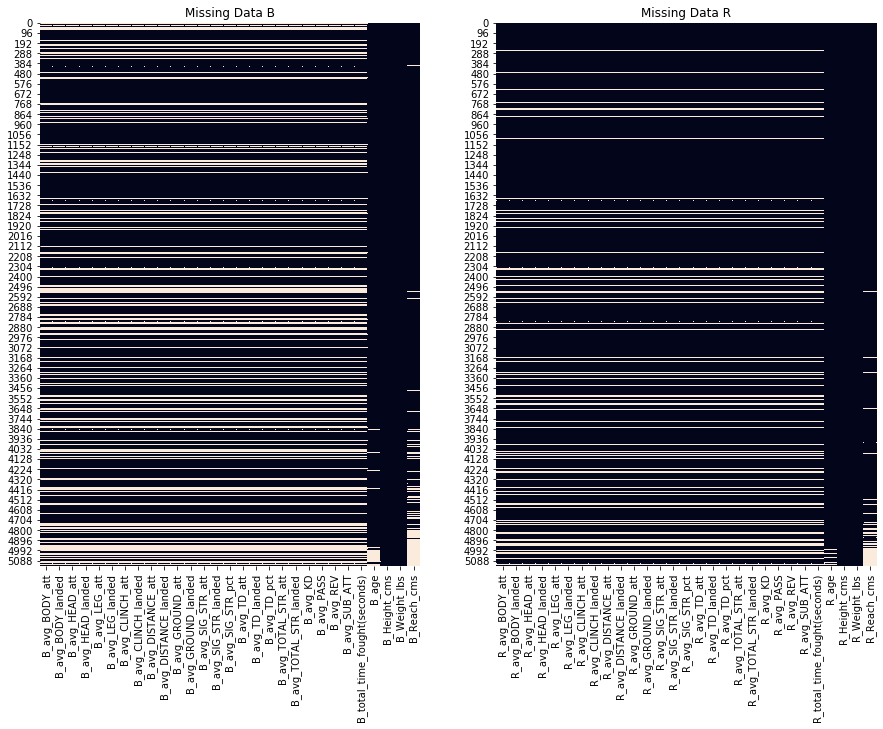

In [38]:
missing_data_B = pd.merge(data_ufc_damage_dealt_B,
                          data_ufc_fighter_bout_stats_B['B_total_time_fought(seconds)'], 
                          left_index=True, 
                          right_index=True).merge(data_ufc_basic_fighter_stats_B, 
                                                  left_index=True,
                                                  right_index=True)

missing_data_R = pd.merge(data_ufc_damage_dealt_R,
                          data_ufc_fighter_bout_stats_R['R_total_time_fought(seconds)'], 
                          left_index=True, 
                          right_index=True).merge(data_ufc_basic_fighter_stats_R, 
                                                  left_index=True,
                                                  right_index=True)


fig, axes = plt.subplots(1,2,figsize=(15,10))
sns.heatmap(missing_data_B.isnull(),
            cbar=False,
            #linewidths=.0001
            ax=axes[0]
            )
axes[0].set_title("Missing Data B")

sns.heatmap(missing_data_R.isnull(),
            cbar=False,
            #linewidths=.0001
            ax=axes[1]
            )
axes[1].set_title("Missing Data R")

From the distribution of the missing values (white lines) of the largest visible group of attributes in the plot it seems that the values are missing completely at random. In the earlier years (bigger indexes) the sparsity is greater though. In most recent years the missing values have become less which might be explained by the greater access of digital tools to create the records. It is not clear why B has twice as much missing values than R.

### Data exploration

The following cell will hold a bunch of data sets we will explore more closely. Our biggest interest lies in exploring men and women separately but also different weight classes.

In [39]:
# Visual exploration
# Plot basic statistics
# Identify interesting subpopulations
## E.g. only male fighters and only 4-5 most popular weight classes
# Form hypotheses and identify actions
## E.g. which attributes do contribute significantly to the weight class
# Transform the hypothesis into a data mining goal, if possible
data_ufc_women = data_ufc[data_ufc['weight_class'].isin(["Women's Flyweight",
                                                         "Women's Strawweight",
                                                         "Women's Bantamweight",
                                                         "Women's Featherweight"])]
data_ufc_men = data_ufc[~data_ufc.isin(data_ufc_women)].dropna(how='all')

print(len(data_ufc_women), len(data_ufc_men))




314 4830


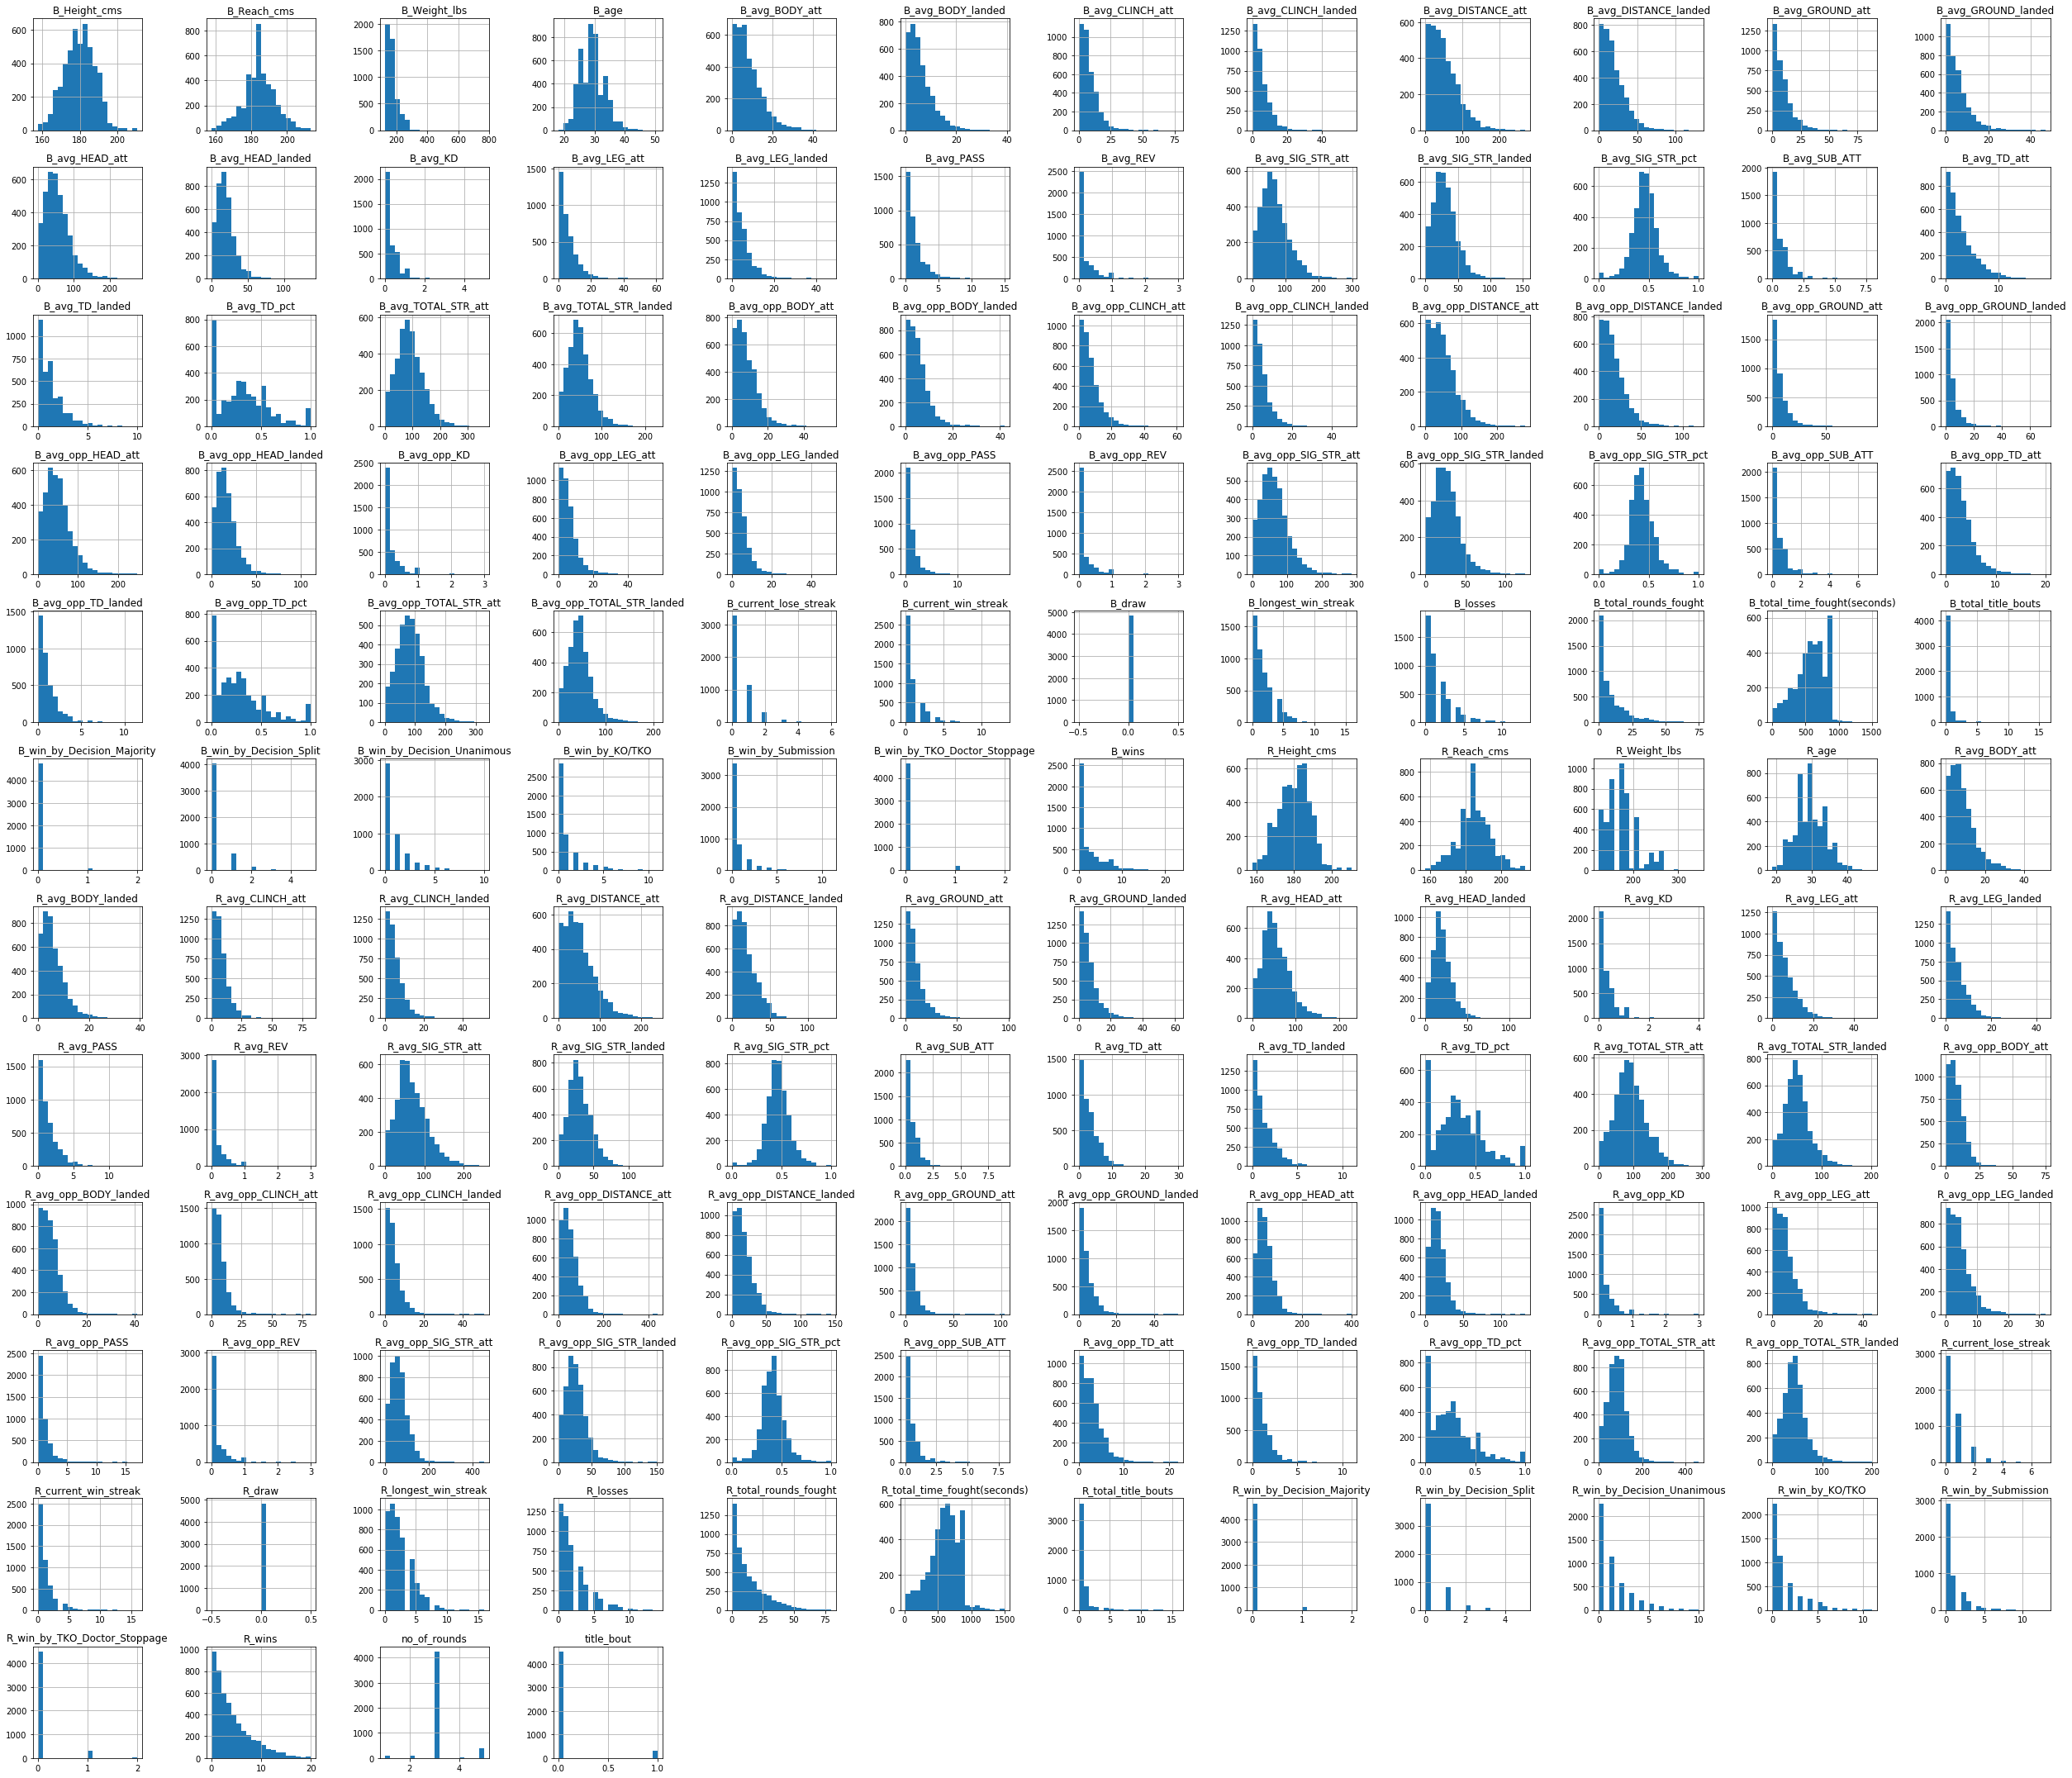

In [40]:
data_ufc_men.hist(figsize=(35,30),
                  bins=20)
plt.tight_layout()
plt.show()

We decided to distinguish between male and female fighters as it is a common separation in sports. Above we plotted the male fighters which are the far bigger subset. We noticed several things:
* Countrary to the test statistics we did in the data description section the distribution of R and B attribute pairs look very similar. Therefore, it sufficies to only focus our investigation on one fighter label, e.g. R.
* We can see that some attributes have little to no distribution. Those attributes are for instance B_draw, R_draw, R_win_by_TKO_Doctor_Stoppage, B_win_by_TKO_Doctor_Stoppage, R_win_by_Decision_Majority. We will exclude them in the further process as they have little variance and thus will not be important for explaining the outcome of weight classes. 
* Another interesting thing is that there are much more blue fighters who have not won any fight than red ones (B_wins vs R_wins). 
* The skewness of wins and losses does also reveal something interesting. As their distribution is the same it means that there are as many fighters who have not won a fight as there are fighters who have not loss any fight. But how does this make sense? It does if there are many fighters with just one record. We will elaborate on this in the next cell.
* There is a lot of skewness in general. Using simple boxplots to detect outliers would therefore be a problem as they rely on symetric data. As we are dealing with highly dimensional data we will need multivariate outlier detection methods.

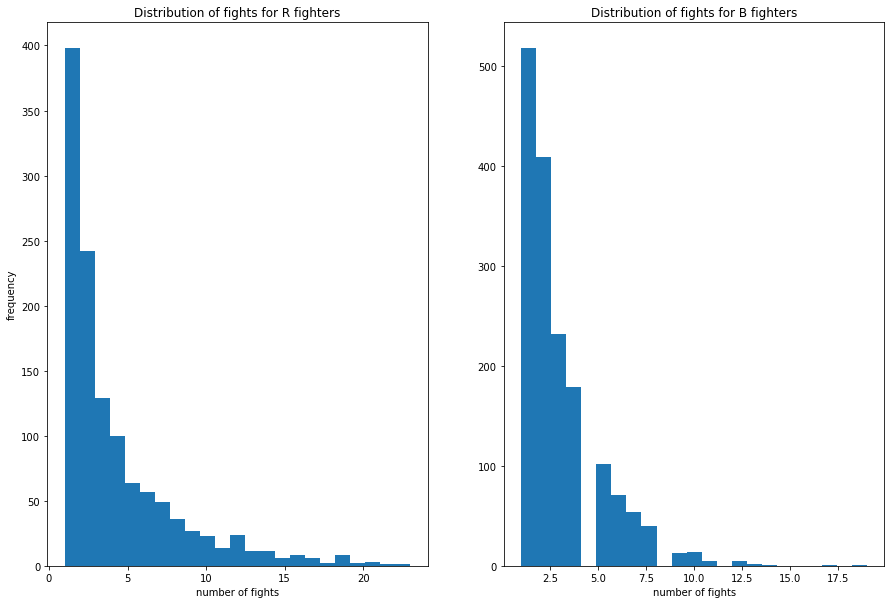

In [41]:
r_fighters = data_ufc_men.groupby('R_fighter').size().sort_values()
b_fighters = data_ufc_men.groupby('B_fighter').size().sort_values()

fig, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].hist(x=r_fighters,bins=23)
axes[0].set_title("Distribution of fights for R fighters")
axes[0].set_xlabel("number of fights")
axes[0].set_ylabel("frequency")
axes[1].hist(x=b_fighters,bins=23)
axes[1].set_title("Distribution of fights for B fighters")
axes[1].set_xlabel("number of fights")

plt.show()

The plots above show how many entries there are in the data for R and B fighters. We see that there are many "one-fight-entries" which supports our finding in the previous step about the similarly skewed wins and losses. This means that a lot of fighters are recorded just once and thus there are many who have not lost or not won a single fight.

### Data quality

In [42]:
# Identify special values and catalog their meaning
# Verify that the meanings of attributes and contained values fit
# Identify missing attributes and blank fields
# Establish the meaning of missing data ! Why is it missing?
# Check for deviations, decide whether it is “noise” or may indicate an interesting phenomenon
# Check for plausability of values
# Review any attributes that give answers that conflict with common sense


### Missing values

#### Types of missing data and suitable methods
#### MCAR: 
 - means that there is no relationship between the missingness of the data and any of the values.
 - As in this case the data is missing at completely random spots there is the option to also delete the row where this is the case. This is mainly due to the fact, that removing random rows does not create any bias. This would not be true for the other cases (MAR, MNAR)

#### MAR: 
 - means that that there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.
 - In this case deletion is no option, as this could create bias in the data. For the records imputation is a better choice.

#### MNAR: 
 - means that there is a systematic relationship between the propensity of a value to be missing and its values. 
 - Similarily to MAR here deletion is also no option, as this would create bias. Imputation is the option of coice.

In [43]:
pd.set_option("display.max_rows", None)
print(data_ufc.isna().sum())

R_fighter                          0
B_fighter                          0
Referee                           23
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1265
B_avg_BODY_landed               1265
B_avg_CLINCH_att                1265
B_avg_CLINCH_landed             1265
B_avg_DISTANCE_att              1265
B_avg_DISTANCE_landed           1265
B_avg_GROUND_att                1265
B_avg_GROUND_landed             1265
B_avg_HEAD_att                  1265
B_avg_HEAD_landed               1265
B_avg_KD                        1265
B_avg_LEG_att                   1265
B_avg_LEG_landed                1265
B_avg_PASS                      1265
B_avg_REV                       1265
B

There are a lot of attributes with missing values. This seems quite a lot to analyze and identify the pattern. However when taking a closer look it becomes clear that it there is actually a very strong pattern: most of the values are missing exactly the same time (650 and 1265 times). By understanding this pattern we can assume that the values are missing at random, which means we cant simply drop the NA values. To create the least amount of bias we decided to use imputation of the most frequent value for these cases.

Other then this there is not a lot of missing values - the ones that are missing are weight, height, stance and the referee. For all of those we dont have any background information. In order to not create any bias we decided to treat them as MNAR and impute also with the most frequent value.

### Outliers

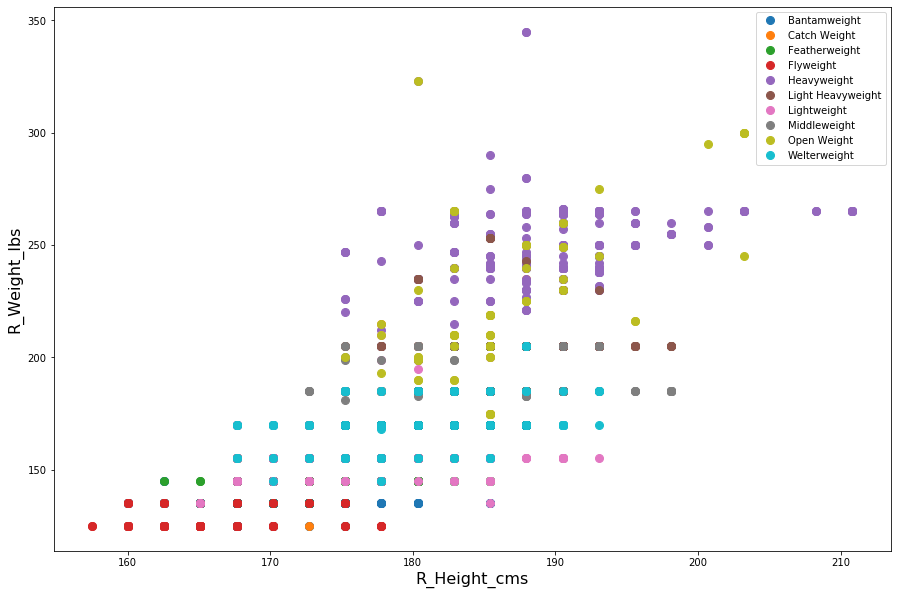

In [44]:
groups = data_ufc_men.groupby('weight_class')

fig, ax = plt.subplots(figsize=(15,10))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['R_Height_cms'], group['R_Weight_lbs'],
            marker='o', linestyle='', ms=8, label=name)
ax.set_xlabel('R_Height_cms', fontsize=16)
ax.set_ylabel('R_Weight_lbs', fontsize=16)
ax.legend()

plt.show()

This 2-dimensional plot above shows a few vertical outliers. We first want to detect them using ellipsoides and then use this approach to detect multivariate outliers. We will need to tune the epsilon parameter (contamination) for this purpose until we only detect those outliers that are also visually obvious.

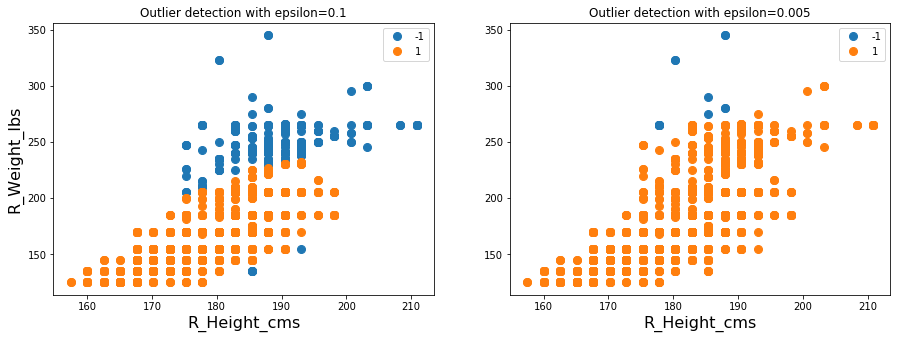

In [45]:
# Multivariate outlier detection with dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.covariance import EllipticEnvelope

# preprocessing
data_ufc_men_o = data_ufc_men.copy()
data_ufc_men_o = data_ufc_men_o.loc[:,['R_Height_cms',
                                     'R_Weight_lbs']].dropna()
# outlier detection
outlier_detection_1 = EllipticEnvelope(contamination=0.1)
outlier_detection_1.fit(data_ufc_men_o)
prediction_1 = outlier_detection_1.predict(data_ufc_men_o)

outlier_detection_2 = EllipticEnvelope(contamination=0.005)
outlier_detection_2.fit(data_ufc_men_o)
prediction_2 = outlier_detection_2.predict(data_ufc_men_o)

data_ufc_men_o['outliers_1'] = prediction_1
data_ufc_men_o['outliers_2'] = prediction_2

# Plotting outliers
groups = data_ufc_men_o.groupby('outliers_1')
groups_2 = data_ufc_men_o.groupby('outliers_2')

fig, axes = plt.subplots(1,2,figsize=(15,5))

for name, group in groups:
    axes[0].plot(group['R_Height_cms'], group['R_Weight_lbs'],
            marker='o', linestyle='', ms=8, label=name)
    
for name, group in groups_2:
    axes[1].plot(group['R_Height_cms'], group['R_Weight_lbs'],
            marker='o', linestyle='', ms=8, label=name)
    
axes[0].set_xlabel('R_Height_cms', fontsize=16)
axes[0].set_ylabel('R_Weight_lbs', fontsize=16)
axes[0].legend()
axes[0].set_title("Outlier detection with epsilon=0.1")

axes[1].set_xlabel('R_Height_cms', fontsize=16)
axes[1].set_title("Outlier detection with epsilon=0.005")
axes[1].legend()
plt.show()


We see that the choice of epsilon is very important. The outliers shown in the right plot are compliant with our visually detected outliers. We will use this setting to detect multivariate outliers now.

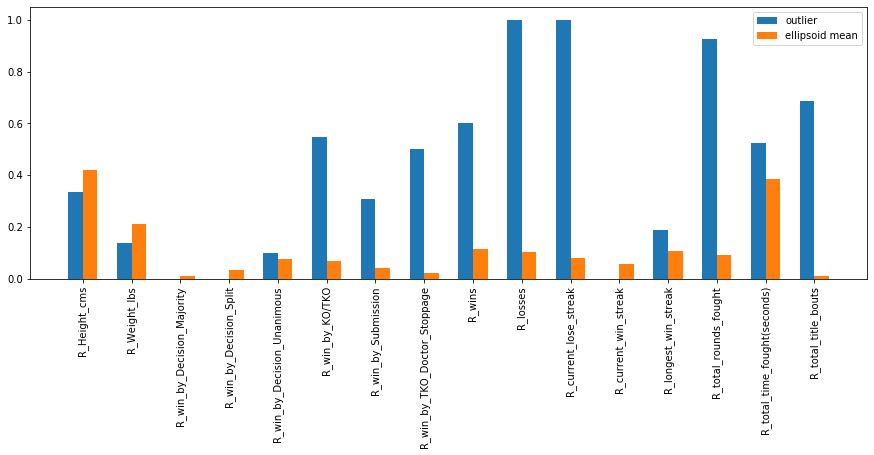

In [46]:
# Multivariate outlier detection with dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.covariance import EllipticEnvelope

# preprocessing
data_ufc_men_om = data_ufc_men.copy()
data_ufc_men_om = data_ufc_men_om.loc[:,[
                                      'R_Height_cms',
                                      'R_Weight_lbs',
                                      'R_win_by_Decision_Majority',
                                      'R_win_by_Decision_Split',
                                      'R_win_by_Decision_Unanimous',
                                      'R_win_by_KO/TKO',
                                      'R_win_by_Submission',
                                      'R_win_by_TKO_Doctor_Stoppage',
                                      'R_wins',
                                      'R_losses',
                                      'R_current_lose_streak',
                                      'R_current_win_streak',
                                      'R_longest_win_streak',
                                      'R_total_rounds_fought',
                                      'R_total_time_fought(seconds)',
                                      'R_total_title_bouts']].dropna()


# Scaling
scaler = MinMaxScaler()
data_ufc_men_om_scaled = pd.DataFrame(scaler.fit_transform(data_ufc_men_om),
                                      columns=data_ufc_men_om.columns)

# outlier detection
outlier_detection = EllipticEnvelope(contamination=0.005)
outlier_detection.fit(data_ufc_men_om_scaled)
prediction = outlier_detection.predict(data_ufc_men_om_scaled)

# Assigning outlier flag to scaled data set
data_ufc_men_om_scaled['outliers'] = prediction
groups = data_ufc_men_om_scaled.groupby('outliers')

o1 = data_ufc_men_om_scaled.query('outliers == -1').iloc[0]
o1 = o1.drop(labels='outliers')

mean = pd.Series(outlier_detection.location_, index=data_ufc_men_om.columns)

# Plotting outlier vs non-outlier
fig, ax = plt.subplots(figsize=(15,5))

bar1_pos = np.arange(len(data_ufc_men_om.columns))
bar2_pos = [x + 0.30 for x in bar1_pos]
xticks = [r + 0.15 for r in range(len(data_ufc_men_om.columns))]

plt.bar(x=bar1_pos,height=o1, width=0.30, label='outlier')
plt.bar(x=bar2_pos,height=mean, width=0.30, label='ellipsoid mean')
plt.xticks(xticks, data_ufc_men_om.columns, rotation=90)

plt.legend()
plt.show()

The bar plot above opposes one outlier to the subset mean scaled with the MinMaxScaler. The subset we were investigating comprises only male fighters and the attributes we chose are from the "fighter bout stats" attribute set. The method we used to find multivarite outliers uses ellipsoids for outlier detection and a level of contamination, i.e. the proporation of outliers in the data set. The condition n_samples > n_features ** 2 needs to be fullfilled in order to work properly which holds true in our case. The outlier shown above has some interesting settings. While the fighter's height and weight are close to the mean his number of total title bouts, wins and losses are far away which is truly unusal for this data set. Also his current loss streak is something which stands out. Eventhough outliers will not be problematic in our chosen machine learning algorithms our approach demonstrates how multivariate outliers can be detected in a highly dimensional data set. 

## Data preparation 

### Select data

Subsampling: If the entire dataset is too large to be processed in its entirety, choose a subsampling strategy to get the dataset to a manageable size. Describe in your report why and how you did it. Make sure your experiment is repeatable. (No manual selection of instances, everything must be in code.)

In [47]:
# Not required

### Clean data
Missing values are imputed with the strategy described above.

In [17]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_num.fit(data_ufc)

data_ufc_clean =  pd.DataFrame(imp_num.transform(data_ufc), columns=data_ufc.columns)
print(data_ufc_clean.isna().sum().sum())

## Drop non-predictive nominal attributes and Date (Blue Figher Name, Red Fighter Name, Referee, Date, Location)
data_ufc_clean.drop(['Referee','location','date','B_fighter','R_fighter'], axis=1, inplace=True)

0


### Construct data

Preprocessing: Get the data into the form needed for training your two algorithms. Describe your preprocessing steps (e.g. transcoding, scaling), why you did it and how you did it

In [18]:
# LabelEncoding
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

data_ufc_clean['Winner'] = lb.fit_transform(data_ufc_clean['Winner']) # Winner
#data_ufc_clean[6] = lb.fit_transform(data_ufc_clean[6])
data_ufc_clean['B_Stance'] = lb.fit_transform(data_ufc_clean['B_Stance']) # Stance of Blue fighter
data_ufc_clean['R_Stance'] = lb.fit_transform(data_ufc_clean['R_Stance']) # Stance of Red fighter
data_ufc_clean.head() 
data_ufc_clean.to_csv("data_ufc_clean.csv", index=None)

# Attribute selection based on correlation matrix
data_ufc_clean = data_ufc_clean[['weight_class',
                                 'R_Height_cms',
                                 'R_Weight_lbs',
                                 'B_Height_cms',
                                 'B_Weight_lbs',
                                 'R_Reach_cms',
                                 'B_Reach_cms']]



## Modeling 

Pick two significantly different classification algorithms, i.e. NO two variations of the same algorithm.
* SVM and Random Forest
* Class attribute: weight_class

### Modeling technique

Describe why you chose the respective algorithms and briefly summarize their characteristics and the semantics underlying its parameters.

### Random Forest

n_estimators: This parameter defines how many trees are in the forrest
criterion: This sets the parameter that is used to evaluate the quality of a certain split in a tree. The options are Gini for Gini impurity and entropy for the information gain
max_features: Defines the number of features that are considered when performing a split.
max_depth: Defines the maximum depth of the trees. The maximum is until all leaves are pure.

Hyperparameter | value | bias | variance
--- | ---| --- | ---
max_features | large | low | high
max_features  | small | high | low
max_depth | large | high | low
max_depth | small | low | high

### Support Vector Machines

Hyperparameters: C, Gamma, kernel

C is the cost of missclassification. It controls the tradeoff between classification of training points accurately and a smooth decision boundary or in a simple word, it suggests the model to choose data points as a support vector.

If the value of C is large then model choose more data points as a support vector and we get the higher variance and lower bias, which may lead to the problem of overfitting and analogously with a small C value.

Gamma is the parameter of a Gaussian Kernel to handle non-linear classification.
A small gamma will give you low bias and high variance while a large gamma will give you higher bias and low variance.

The choice of kernel is important based on the relationship between the data. Especially, if the data is not linear the rbf kernel might be useful in combination with the gamma parameter. The idea is mapping the non-linear separable data-set into a higher dimensional space where we can find a hyperplane that can separate the samples.

The art is to choose a model with optimal bias and variance.

Hyperparameter | value | bias | variance
--- | ---| --- | ---
C | large | low | high
C | small | high | low
gamma | large | high | low
gamma | small | low | high

### Test desgin

The model will be tested using an incrementally varying train/test split approach. We will start with a split of 5%/95% (train/test) and increment the split ratio by 10% until 95%/5% is reached.
For each training set size we will perform multiple runs to observe the sensitivity to the actual subset used for training a specific run.

### Build Model

Train your two algorithms in 3 separate experiment tracks as detailed below and evaluate your results with a reasonable quality measure for your algorithms (e.g.: (micro/macro) Precision/Recall, Mean Absolute Error,…). Interpret your results using both graphs and summaries (e.g. confusion matrices). For each of the 3 experiment tracks you should separately vary and document:
* Parameters: If the classifier has specific parameters, explore their effect with different settings using 10-fold cross-validation and document the parameters and the results and analyze the sensitivity of classification outcomes against these parameters. Specifically, test extreme/obviously wrong settings and analyze the results
* Scaling: where possible, try different scaling approaches (min/max, zero mean/unit variance, length) using the best parameters identified above and observe the difference in classification performance using 10-fold cross-validation. Analyze the reasons for the effects observed, test useful and also non-useful (!) scalings and summarize your findings as well as analyze reasons why specific scalings make sense in a given setting.
* Training / test set splits: Use the best parameter setting and scaling identified above and evaluate the effect of different training and test set splits. Start with a small training set and increase it in small increments (e.g. 10 sets from 5% / 95% (train/test) in 10%-increments to 95%/5% (train/test)) and observe performance changes. Perform multiple runs with each training set size to observe the sensitivity to the actual subset used for training a specific run. Analyze the variance in performance obtained

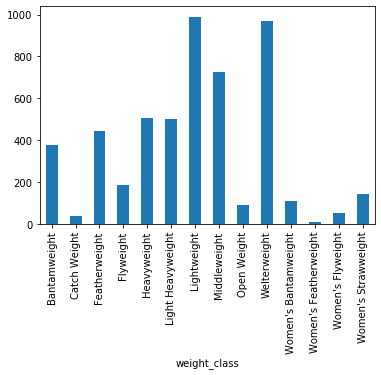

In [19]:
X = data_ufc_clean[data_ufc_clean.columns.difference(['weight_class'])]
Y = data_ufc_clean['weight_class']

weight_class_dist = data_ufc_clean.groupby('weight_class').count()['R_Weight_lbs']
weight_class_dist.plot.bar()

The plot above shows the distribution of the weight class labels. We can see that it is not uniform which is an important hint for chosing the right averaging method for the used score. If there is a label imbalance like in the plot above, 'weighted' might be more suitable than other averaging methods for the f1 score as the number of instances per class is considered.

### Random Forest

#### Parameter calibration

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


def rf_param_selection(X, y, nfolds):
    classifier_rf = RandomForestClassifier()    
    
    param_grid = { 
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_features': [None, 'sqrt', 'log2'],
        'classifier__max_depth' : [2,5,7,10,15],
        'classifier__criterion' :['gini', 'entropy'],
        #'pca__n_components': [2, 5, 10, 15]
        }
    
    pipe = Pipeline([
        ('scale', StandardScaler()), # fit/transform object
        ('classifier', classifier_rf) # estimator
    ])
    
    '''The F1 score can be interpreted as a weighted average of the precision and recall,
    where an F1 score reaches its best value at 1 and worst score at 0.
    Target is multiclass but average='binary'. 
    Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
    '''
    # Precision: "How useful are the results"
    # Recall: "How complete are the results"
    scores = ['accuracy', 'f1_weighted'] # weighted, micro, macro, sample averaging methods. weighted good if there is a label imbalance (see plot above)
    
    grid_search = GridSearchCV(pipe,
                               param_grid=param_grid,
                               scoring = scores,
                               refit = 'f1_weighted', # For multi-metric scoring, the parameter refit must be set to a scorer key or a callable to refit an estimator with the best parameter setting on the whole data and make the best_* attributes available for that metric. If this is not needed, refit should be set to False explicitly. True was passed.
                               cv=nfolds)
    grid_search.fit(X, y) # Run fit with all sets of parameters
    return grid_search.best_params_, grid_search.cv_results_

results_RF = rf_param_selection(X,Y,10)

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

In [21]:
results_parameters_RF = pd.DataFrame.from_dict(results_RF[1])
results_parameters_RF = results_parameters_RF[['mean_fit_time', 'param_classifier__criterion', 'param_classifier__max_depth', 'param_classifier__max_features', 'param_classifier__n_estimators', 'mean_test_accuracy', 'mean_test_f1_weighted']].sort_values(by=['mean_test_f1_weighted'])
parameters_RF = results_RF[0]
results_parameters_RF

mean_fit_time param_classifier__criterion param_classifier__max_depth  \
0        0.111129                        gini                           2   
2        0.289129                        gini                           2   
1        0.183638                        gini                           2   
48       0.074814                     entropy                           2   
53       0.208928                     entropy                           2   
50       0.220918                     entropy                           2   
52       0.160737                     entropy                           2   
49       0.150419                     entropy                           2   
51       0.074491                     entropy                           2   
46       0.200001                     entropy                           2   
7        0.148201                        gini                           2   
45       0.102612                     entropy                           2   
3        0.117159                        gini                           2   
4        0.196099                        gini                           2   
8        0.209126                        gini                           2   
6        0.075799                        gini                           2   
5        0.212690                        gini                           2   
47       0.304660                     entropy                           2   
12       0.105046                        gini                           5   
16       0.179385                        gini                           5   
10       0.299717                        gini                           5   
56       0.495659                     entropy                           5   
17       0.266305                        gini                           5   
13       0.197733                        gini                           5   
15       0.093353                        gini                           5   
9        0.164393                        gini                           5   
11       0.462207                        gini                           5   
57       0.100330                     entropy                           5   
55       0.334484                     entropy                           5   
14       0.267179                        gini                           5   
60       0.099501                     entropy                           5   
54       0.171517                     entropy                           5   
62       0.282098                     entropy                           5   
59       0.291841                     entropy                           5   
61       0.204560                     entropy                           5   
58       0.194645                     entropy                           5   
23       0.308637                        gini                           7   
26       0.320503                        gini                           7   
21       0.110028                        gini                           7   
24       0.118275                        gini                           7   
66       0.120648                     entropy                           7   
22       0.206495                        gini                           7   
25       0.207178                        gini                           7   
71       0.364545                     entropy                           7   
70       0.243495                     entropy                           7   
67       0.254900                     entropy                           7   
20       0.536359                        gini                           7   
64       0.437140                     entropy                           7   
18       0.182561                        gini                           7   
68       0.401582                     entropy                           7   
69       0.120386                     entropy                           7   


In [22]:
overview_RF = results_parameters_RF[0:2].append(results_parameters_RF[-2:])
overview_RF.columns = ['mean_fit_time','Criterion','MaxDepth','MaxFeatures','N_Estimators','Accuracy','F1']
overview_RF[['Criterion', 'MaxDepth', 'MaxFeatures', 'N_Estimators', 'F1']]

Criterion MaxDepth MaxFeatures N_Estimators        F1
0       gini        2        None           50  0.448988
2       gini        2        None          150  0.456555
43      gini       15        log2          100  0.834028
41      gini       15        sqrt          150  0.835087

#### Scaler calibration

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate


def rf_scaler_selection(X, y, nfolds):   
    classifier_rf = RandomForestClassifier(n_estimators=parameters_RF['classifier__n_estimators'],
                         max_features=parameters_RF['classifier__max_features'],
                         max_depth=parameters_RF['classifier__max_depth'],
                         criterion=parameters_RF['classifier__criterion']
                        )   
    
    pipe1 = Pipeline([
        ('scale', StandardScaler()),
        ('classifier', classifier_rf)
    ])
    
    pipe2 = Pipeline([
        ('scale', MinMaxScaler()),
        ('classifier', classifier_rf)
    ])
    
    pipe3 = Pipeline([
        ('scale', MaxAbsScaler()),
        ('classifier', classifier_rf)
    ])
    
    pipe4 = Pipeline([
        ('scale', RobustScaler()),
        ('classifier', classifier_rf)
    ])
        
    pipe5 = Pipeline([
        ('scale', PowerTransformer()),
        ('classifier', classifier_rf)
    ])
    
    pipes = [pipe1, pipe2, pipe3, pipe4, pipe5]
    '''The F1 score can be interpreted as a weighted average of the precision and recall,
    where an F1 score reaches its best value at 1 and worst score at 0.
    Target is multiclass but average='binary'. 
    Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
    '''
    scores = ['accuracy', 'f1_weighted']
    best_params = []
    for pipe in pipes:
        cv_results = cross_validate(pipe, 
                                 X,
                                 y,
                                 cv=nfolds,
                                 scoring=scores)
        best_params.append(cv_results['test_f1_weighted'].mean())
    return best_params

scaler_RF = rf_scaler_selection(X,Y,10)

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wagn3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
scaler_RF_df = pd.DataFrame(scaler_RF).T
scaler_RF_df.columns = ['StandardScaler','MinMaxScaler','MaxAbsScaler','RobustScaler','PowerTransformer']
scaler_RF_df

,StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,PowerTransformer
0,0.832896,0.833062,0.835516,0.835016,0.720569


The Robust Scaler produces the best results

#### Train/test splits

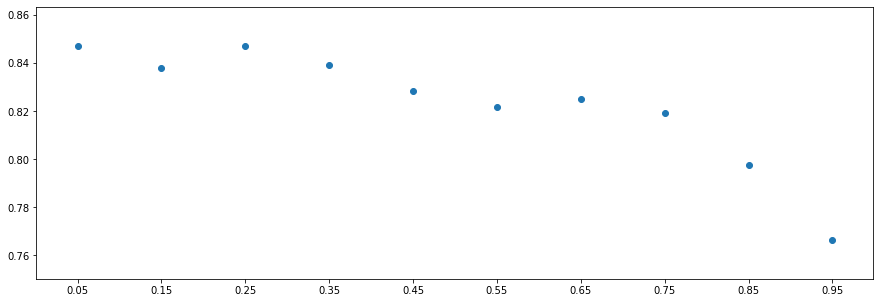

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
    
def test_splits(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=test_size, random_state=0)

    classifier_rf = RandomForestClassifier(criterion='gini', max_depth=15, max_features='log2', n_estimators=150)
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    classifier_rf.fit(X_train_scaled, y_train)
    y_pred = classifier_rf.predict(X_test_scaled)

    '''np.set_printoptions(precision=2)
    disp = plot_confusion_matrix(classifier_rf, X_test_scaled, y_test,
                                 display_labels=classifier_rf.classes_,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    disp.ax_.set_title('Confusion matrix')
    plt.xticks(xticks, classifier_svm.classes_, rotation=90)'''
    return f1_score(y_test, y_pred, average='weighted')

test_splits_and_scores = []
for i in np.arange(0.05,1.05,0.10):
    test_splits_and_scores.append([i,test_splits(i)])

test_splits_and_scores_df = pd.DataFrame(test_splits_and_scores, columns=['test_size','score']) 

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xticks(test_splits_and_scores_df['test_size'])
plt.scatter(test_splits_and_scores_df['test_size'], test_splits_and_scores_df['score'])

### Support Vector Machines

#### Parameter calibration

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


def svc_param_selection(X, y, nfolds):
    classifier_svm = SVC()  
    
    Cs = [0.001, 0.01, 0.1, 1, 10, 100]
    gammas = [0.001, 0.01, 0.1, 1, 10]
    #n_components = [2, 5, 10, 15]
    
    param_grid = [
        {'classifier__C': Cs, 
         'classifier__gamma': gammas,
         'classifier__kernel': ['linear', 'rbf'],
         #'pca__n_components': n_components
        }
    ]
    
    pipe = Pipeline([
        ('scale', StandardScaler()), # fit/transform object
        #('pca', PCA()),
        ('classifier', classifier_svm) # estimator
        #('classifier', PipelineHelper([
          #('svm', LinearSVC()),
          #('rf', RandomForestClassifier())])),
    ])
    
    '''The F1 score can be interpreted as a weighted average of the precision and recall,
    where an F1 score reaches its best value at 1 and worst score at 0.
    Target is multiclass but average='binary'. 
    Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
    '''
    # Precision: "How useful are the results"
    # Recall: "How complete are the results"
    scores = ['accuracy', 'f1_weighted'] # weighted, micro, macro, sample averaging methods. weighted good if there is a label imbalance (see plot above)
    
    grid_search = GridSearchCV(pipe,
                               param_grid=param_grid,
                               scoring = scores,
                               refit = 'f1_weighted', # For multi-metric scoring, the parameter refit must be set to a scorer key or a callable to refit an estimator with the best parameter setting on the whole data and make the best_* attributes available for that metric. If this is not needed, refit should be set to False explicitly. True was passed.
                               cv=nfolds)
    grid_search.fit(X, y) # Run fit with all sets of parameters
    return grid_search.best_params_, grid_search.cv_results_

results_SVM = svc_param_selection(X,Y,10)

In [31]:
results_parameters_SVM = pd.DataFrame.from_dict(results_SVM[1])
results_parameters_SVM = results_parameters_SVM[['mean_fit_time', 'param_classifier__C', 'param_classifier__gamma', 'param_classifier__kernel', 'mean_test_accuracy', 'mean_test_f1_weighted']].sort_values(by=['mean_test_f1_weighted'])
parameters_SVM = results_SVM[0]
results_parameters_SVM

,mean_fit_time,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_accuracy,mean_test_f1_weighted
1,0.720003,0.001,0.001,rbf,0.192263,0.062009
3,0.729900,0.001,0.01,rbf,0.192263,0.062009
19,1.097019,0.01,10,rbf,0.192263,0.062009
5,0.782783,0.001,0.1,rbf,0.192263,0.062009
7,0.819238,0.001,1,rbf,0.192263,0.062009
11,0.744451,0.01,0.001,rbf,0.192263,0.062009
9,0.770624,0.001,10,rbf,0.192263,0.062009
13,0.751939,0.01,0.01,rbf,0.227827,0.114099
21,0.739578,0.1,0.001,rbf,0.247457,0.133025
29,1.319084,0.1,10,rbf,0.351463,0.257176


In [32]:
overview_RF = results_parameters_SVM[0:2].append(results_parameters_SVM[-2:])
overview_RF.columns = ['mean_fit_time','C','Gamma','Kernel','Accuracy','F1']
overview_RF[['C','Gamma','Kernel', 'F1']]

,C,Gamma,Kernel,F1
1,0.001,0.001,rbf,0.062009
3,0.001,0.01,rbf,0.062009
55,100,0.1,rbf,0.800265
47,10,1,rbf,0.805406


As we can see, the parameters C=10, gamma=1 and kernel = rbf seems to work best among the evaluated  grid parameter values.

#### Scaler calibration

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate


def svc_scaler_selection(X, y, nfolds):   
    classifier_svm = SVC(C=parameters_SVM['classifier__C'],
                         gamma=parameters_SVM['classifier__gamma'],
                         kernel=parameters_SVM['classifier__kernel'])   
    
    pipe1 = Pipeline([
        ('scale', StandardScaler()),
        ('classifier', classifier_svm)
    ])
    
    pipe2 = Pipeline([
        ('scale', MinMaxScaler()),
        ('classifier', classifier_svm)
    ])
    
    pipe3 = Pipeline([
        ('scale', MaxAbsScaler()),
        ('classifier', classifier_svm)
    ])
    
    pipe4 = Pipeline([
        ('scale', RobustScaler()),
        ('classifier', classifier_svm)
    ])
        
    pipe5 = Pipeline([
        ('scale', PowerTransformer()),
        ('classifier', classifier_svm)
    ])
    
    pipes = [pipe1, pipe2, pipe3, pipe4, pipe5]
    '''The F1 score can be interpreted as a weighted average of the precision and recall,
    where an F1 score reaches its best value at 1 and worst score at 0.
    Target is multiclass but average='binary'. 
    Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
    '''
    scores = ['accuracy', 'f1_weighted']
    best_params = []
    for pipe in pipes:
        cv_results = cross_validate(pipe, 
                                 X,
                                 y,
                                 cv=nfolds,
                                 scoring=scores)
        best_params.append(cv_results['test_f1_weighted'].mean())
    return best_params

scaler_svc = svc_scaler_selection(X,Y,10)

In [34]:
scaler_svc = pd.DataFrame(scaler_svc).T
scaler_svc.columns = ['StandardScaler','MinMaxScaler','MaxAbsScaler','RobustScaler','PowerTransformer']
scaler_svc

,StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,PowerTransformer
0,0.805406,0.754721,0.748354,0.810836,0.808028


It turns out that RobustScaler returns the highest f1_weighted score. Now we have the best parameters and the best Scaler for our predictions comming up.

#### Train/test splits

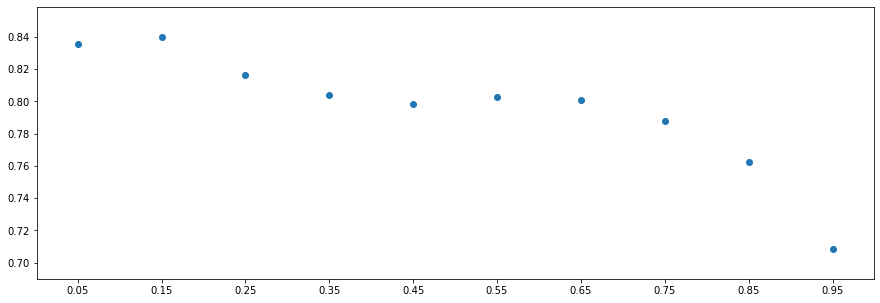

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
    
def test_splits(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=test_size, random_state=0)

    classifier_svm = SVC(C=10, gamma=1, kernel='rbf') 
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    classifier_svm.fit(X_train_scaled, y_train)
    y_pred = classifier_svm.predict(X_test_scaled)

    '''np.set_printoptions(precision=2)
    disp = plot_confusion_matrix(classifier_svm, X_test_scaled, y_test,
                                 display_labels=classifier_svm.classes_,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    disp.ax_.set_title('Confusion matrix')
    plt.xticks(xticks, classifier_svm.classes_, rotation=90)'''
    return f1_score(y_test, y_pred, average='weighted')

test_splits_and_scores = []
for i in np.arange(0.05,1.05,0.10):
    test_splits_and_scores.append([i,test_splits(i)])

test_splits_and_scores_df = pd.DataFrame(test_splits_and_scores, columns=['test_size','score']) 

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xticks(test_splits_and_scores_df['test_size'])
plt.scatter(test_splits_and_scores_df['test_size'], test_splits_and_scores_df['score'])



### Ideal Models
With the best parameters, the best scaling and the best train/test split

#### Random Forest

In [39]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.15, random_state=0)

classifier_rf = RandomForestClassifier(criterion='gini', max_depth=15, max_features='log2', n_estimators=150)
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

classifier_rf.fit(X_train_scaled, y_train)
y_pred = classifier_rf.predict(X_test_scaled)

confusion_matrix(y_test, y_pred)

array([[ 51,   0,   2,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0],
       [  1,   1,   0,   0,   1,   0,   1,   2,   0,   0,   0,   0,   0,
          0],
       [  0,   0,  57,   0,   0,   0,  11,   0,   0,   0,   1,   0,   0,
          0],
       [  5,   0,   0,  16,   0,   0,   0,   0,   0,   0,   2,   0,   1,
          0],
       [  0,   0,   0,   0,  83,   1,   0,   0,   2,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   1,  55,   0,  10,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   8,   0,   0,   0, 132,   0,   0,   9,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   7,   0,  94,   0,   5,   0,   0,   0,
          0],
       [  0,   1,   0,   0,   6,   1,   0,   0,   8,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  11,   7,   0, 127,   0,   0,   0,
          0],
       [  9,   0,   0,   4,   0,   0,   0,   0,   0,   0,  10,   0,   0,
          1],
       [  0,   0,   3,   0,   0,   0,   0, 

#### Support Vector Classifier

In [40]:
classifier_svm = SVC(C=10, gamma=1, kernel='rbf')
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

classifier_svm.fit(X_train_scaled, y_train)
y_pred = classifier_rf.predict(X_test_scaled)

confusion_matrix(y_test, y_pred)

array([[ 51,   0,   2,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0],
       [  1,   1,   0,   0,   1,   0,   1,   2,   0,   0,   0,   0,   0,
          0],
       [  0,   0,  57,   0,   0,   0,  11,   0,   0,   0,   1,   0,   0,
          0],
       [  5,   0,   0,  16,   0,   0,   0,   0,   0,   0,   2,   0,   1,
          0],
       [  0,   0,   0,   0,  83,   1,   0,   0,   2,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   1,  55,   0,  10,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   8,   0,   0,   0, 132,   0,   0,   9,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   7,   0,  94,   0,   5,   0,   0,   0,
          0],
       [  0,   1,   0,   0,   6,   1,   0,   0,   8,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  11,   7,   0, 127,   0,   0,   0,
          0],
       [  9,   0,   0,   4,   0,   0,   0,   0,   0,   0,  10,   0,   0,
          1],
       [  0,   0,   3,   0,   0,   0,   0, 

## Summary

* What trends do you observe in each set of experiments?
* How easy was it to interpret the algorithm and its performance?
* Which classes are most frequently mixed-up? (and why?)
* What parameter settings cause performance changes?
* Do both algorithms show the same behavior in performance, performance degradation / robustness against
  * smaller and larger training set sizes?
  * variations in parameter settings?
* Did you observe or can you force and document characteristics such as over-learning?
* How does the performance change with different amounts of training data being available? What are the best scalings (per attribute / per vector) and why?



Which trends did we observe?
Independently of the classifier we found that the parameters have a huge impact on the results. This was even more the case for SVC then for RF.

Was it easy to interpret the results?
The results were easy for us to interpret. The main challenge was extracting information from the big result tables of the gridsearch for parameter, but this is just in the nature of such big tables.

What were the important parameters?
For Random Forest we found that the max_depth parameter had a big impact on the results. This is natural, since it determines the depth of the tree and a shallow tree can not make a lot of decisions.
For Support Vector Classifier the most important parameter was C. This is again something that was expected, since C set the penalty for misclassification.

Do the algorithms behave the same in terms of train test split and parameters (sensitivity)?
Both classifiers behave very similar in regard to the train/test split ratios: Both produce worse results the bigger the test ratio gets.
In terms of parameters SVC was more sensitive and produced highly different results depending on the parameters (mainly C). But also RF showed big differences in the results depending on the parameters, although by far not as big as the ones of SVC.

Did we see overlearning?
In Tables 7 and 8 one can see the first signs of overlearning. Here we can see that the results where 95% of the data is used for training are worse than the ones where just 85% of the data is used for training. This is most likely the case because the classifier was fitted to closely to the training data and we therefore had overlearning/overfit.

What was the impact of training data on the performance?
The ratio of the training vs test data had a big impact on the results. For both classifiers ratios above 15% test data lead to worse results.

What were the best scalings?
For both classifiers we found that the robust scaler produced the best results - most likely since this scaler does not get impacted by outliers.
